In [16]:
from neural_analysis_pkg.core import NeuralAnalysis

In [17]:
# Define the path to your project folder
project_folder_path ='/home/cresp1el-local/Documents/MATLAB/Data/lmc_project_v2/Whisker'
# Initialize the NeuralAnalysis class with the project folder path
analysis = NeuralAnalysis(project_folder_path)

Loaded existing recording results dataframe from /home/cresp1el-local/Documents/MATLAB/Data/lmc_project_v2/Whisker/SpikeStuff/recording_results.csv


In [8]:
#analysis.process_MUA() # Process the MUA data to create the downsampled and filtered MUA data, no need to do this again if you have already done it once

# save this dataframe to a csv file using the csv file path as the argument so you dont have to run the downsampling and filtering again
# analysis.recording_results_df.to_csv(os.path.join(project_folder_path,'SpikeStuff/recording_results.csv'))

AttributeError: 'NeuralAnalysis' object has no attribute 'pr'

In [18]:
analysis.file_path

'/home/cresp1el-local/Documents/MATLAB/Data/lmc_project_v2/Whisker'

In [19]:
analysis.recording_results_df

Unnamed: 0   group_name        recording_name  \
0           0    Lmc_opsin    lmc_ch_2_3093_rec1   
1           1    Lmc_opsin    lmc_ch_1_3094_rec2   
2           2    Lmc_opsin    lmc_ch_1_3094_rec1   
3           3  Lmc_noopsin  lmc_noch_1_3096_rec1   
4           4  Lmc_noopsin  lmc_noch_1_3096_rec2   

                                    downsampled_path  \
0  /home/cresp1el-local/Documents/MATLAB/Data/lmc...   
1  /home/cresp1el-local/Documents/MATLAB/Data/lmc...   
2  /home/cresp1el-local/Documents/MATLAB/Data/lmc...   
3  /home/cresp1el-local/Documents/MATLAB/Data/lmc...   
4  /home/cresp1el-local/Documents/MATLAB/Data/lmc...   

                                          rms_values       iqr  \
0  [170.52816270803297, 172.8074476873955, 175.11...  4.686566   
1  [169.76160010287387, 172.07686648663235, 174.7...  3.035201   
2  [174.26712509310488, 172.37445379634585, 180.8...  7.463998   
3  [169.26424775999243, 171.4846387576975, 173.33...  2.762267   
4  [170.05101760301815, 172.9588068684812, 170.34...  3.586824   

                                       good_channels noisy_channels  \
0  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...           [13]   
1  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...           [31]   
2  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...             []   
3  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...           [31]   
4  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...           [31]   

                                       mua_data_path  
0  /home/cresp1el-local/Documents/MATLAB/Data/lmc...  
1  /home/cresp1el-local/Documents/MATLAB/Data/lmc...  
2  /home/cresp1el-local/Documents/MATLAB/Data/lmc...  
3  /home/cresp1el-local/Documents/MATLAB/Data/lmc...  
4  /home/cresp1el-local/Documents/MATLAB/Data/lmc...

In [20]:
analysis.extract_stimulation_data()

In [21]:
analysis.stimulation_data_df

onset_times  offset_times  stimulation_ids   group_name  \
0          19.523        20.023                4    Lmc_opsin   
1          27.202        27.702                4    Lmc_opsin   
2          39.451        39.951                3    Lmc_opsin   
3          41.759        42.259                2    Lmc_opsin   
4          50.476        50.976                1    Lmc_opsin   
...           ...           ...              ...          ...   
4966     7972.475      7972.975                2  Lmc_noopsin   
4967     7982.583      7983.083                1  Lmc_noopsin   
4968     7988.389      7988.889                4  Lmc_noopsin   
4969     7994.956      7995.456                3  Lmc_noopsin   
4970     8007.913      8008.413                4  Lmc_noopsin   

            recording_name  
0       lmc_ch_2_3093_rec1  
1       lmc_ch_2_3093_rec1  
2       lmc_ch_2_3093_rec1  
3       lmc_ch_2_3093_rec1  
4       lmc_ch_2_3093_rec1  
...                    ...  
4966  lmc_noch_1_3096_rec2  
4967  lmc_noch_1_3096_rec2  
4968  lmc_noch_1_3096_rec2  
4969  lmc_noch_1_3096_rec2  
4970  lmc_noch_1_3096_rec2  

[4971 rows x 5 columns]

In [ ]:
analysis.extract_spike_times()

In [22]:
analysis.recording_results_df['mua_data_path'][0]

'/home/cresp1el-local/Documents/MATLAB/Data/lmc_project_v2/Whisker/SpikeStuff/Lmc_opsin/lmc_ch_2_3093_rec1/temp_wh_MUA.npy'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

def calculate_firing_rates(recording_name, recording_results_df, stimulation_data_df, n_channels):
    # Get the mua_data_path for the current recording to get the spike_data_path where the spike times are stored
    mua_data_path = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'mua_data_path'
    ].values[0]
    
    # Construct the spike_data_path from the mua_data_path
    spike_data_path = mua_data_path.replace('_MUA.npy', '_spike_times.npy')
    
    # Step 1: Identify the time windows for stimulus_id = 1
    stim_data = stimulation_data_df[
        (stimulation_data_df['recording_name'] == recording_name) & 
        (stimulation_data_df['stimulation_ids'] == 2)
    ]
    
    # Step 2: Load the corresponding spike times
    spike_data = np.load(spike_data_path, allow_pickle=True)
    spike_times = spike_data['time']
    spike_channels = spike_data['channel']
    
    # Get good and noisy channels for the current recording
    good_channels = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'good_channels'
    ].values[0]
    noisy_channels = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'noisy_channels'
    ].values[0]

    # Step 3 & 4: Calculate and aggregate the firing rates
    firing_rates = np.full((n_channels, len(stim_data)), np.nan) # Initialize with NaNs 

    for i, (onset, offset) in enumerate(zip(stim_data['onset_times'], stim_data['offset_times'])):
        for ch in good_channels:
            # Find spikes in the current channel and time window
            condition = (spike_channels == ch) & (spike_times >= onset) & (spike_times <= offset)
            spikes_in_window = spike_times[np.where(condition)]
            
            # Calculate the firing rate
            firing_rate = len(spikes_in_window) / (offset - onset)
            firing_rates[ch, i] = firing_rate
    
    # Step 5: Plotting the heatmap
    plt.imshow(firing_rates, aspect='auto', cmap='hot', interpolation='nearest')
    plt.colorbar(label='Firing Rate (Hz)')
    plt.ylabel('Channel')
    plt.xlabel('Trial')
    plt.title('Firing Rate Heatmap for Stimulus ID = 2')
    plt.yticks(range(n_channels), range(1, n_channels+1))  # Label y-axis with channel numbers
    plt.show()
    
#run the function
calculate_firing_rates('lmc_ch_2_3093_rec1', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels)


FOR STIM 2

In [ ]:
def calculate_firing_rates(recording_name, recording_results_df, stimulation_data_df, n_channels):
    # Get the mua_data_path for the current recording to get the spike_data_path where the spike times are stored
    mua_data_path = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'mua_data_path'
    ].values[0]
    
    # Construct the spike_data_path from the mua_data_path
    spike_data_path = mua_data_path.replace('_MUA.npy', '_spike_times.npy')
    
    # Step 1: Identify the time windows for stimulus_id = 2
    stim_data = stimulation_data_df[
        (stimulation_data_df['recording_name'] == recording_name) & 
        (stimulation_data_df['stimulation_ids'] == 2)
    ]
    
    # Step 2: Load the corresponding spike times
    spike_data = np.load(spike_data_path, allow_pickle=True)
    spike_times = spike_data['time']
    spike_channels = spike_data['channel']
    
    # Get good and noisy channels for the current recording
    good_channels = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'good_channels'
    ].values[0]
    noisy_channels = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'noisy_channels'
    ].values[0]

    # Step 3 & 4: Calculate and aggregate the firing rates
    firing_rates = np.full((n_channels, len(stim_data)), np.nan) # Initialize with NaNs 

    for i, (onset, offset) in enumerate(zip(stim_data['onset_times'], stim_data['offset_times'])):
        for ch in good_channels:
            # Find spikes in the current channel and time window
            condition = (spike_channels == ch) & (spike_times >= onset) & (spike_times <= offset)
            spikes_in_window = spike_times[np.where(condition)]
            
            # Calculate the firing rate
            firing_rate = len(spikes_in_window) / (offset - onset)
            firing_rates[ch, i] = firing_rate
    
    # Step 5: Plotting the heatmap
    plt.imshow(firing_rates, aspect='auto', cmap='hot', interpolation='nearest')
    plt.colorbar(label='Firing Rate (Hz)')
    plt.ylabel('Channel')
    plt.xlabel('Trial')
    plt.title('Firing Rate Heatmap for Stimulus ID = 2')
    plt.yticks(range(n_channels), range(1, n_channels+1))  # Label y-axis with channel numbers
    plt.show()
    
calculate_firing_rates('lmc_ch_2_3093_rec1', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels)

In [ ]:
calculate_firing_rates('lmc_ch_1_3094_rec1', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels)

In [ ]:
calculate_firing_rates('lmc_ch_1_3094_rec2', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels)

In [ ]:
analysis.recording_results_df

In [ ]:
calculate_firing_rates('lmc_noch_1_3096_rec1', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels)

In [ ]:
calculate_firing_rates('lmc_noch_1_3096_rec2', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels)

In [ ]:
analysis.recording_results_df['mua_data_path'][0]   

In [23]:
from scipy.ndimage import gaussian_filter1d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def estimate_instantaneous_firing_rate(recording_name, recording_results_df, n_channels, bin_size=0.001, window_length=0.05, window_sd=0.005):
    """
    Estimate the instantaneous firing rate by convolving the spike time series with a Gaussian window.

    Parameters:
    - recording_name (str): The name of the recording to process.
    - recording_results_df (pd.DataFrame): The data frame containing the recording results.
    - n_channels (int): The number of channels in the recording.
    - bin_size (float): The bin size for discretizing the spike times, in seconds. Default is 1 ms (0.001 s).
    - window_length (float): The length of the Gaussian window in seconds. Default is 50 ms (0.05 s).
    - window_sd (float): The standard deviation of the Gaussian window in seconds. Default is 5 ms (0.005 s).
    
    Returns:
    - firing_rate_estimates (ndarray): A 2D array where each row represents a channel and each column represents a time bin. The values represent the estimated firing rates in Hz.
    """

    # Get the mua_data_path for the current recording to get the spike_data_path where the spike times are stored
    mua_data_path = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'mua_data_path'
    ].values[0]
    
    # Construct the spike_data_path from the mua_data_path
    spike_data_path = mua_data_path.replace('_MUA.npy', '_spike_times.npy')
    
    # Step 1: Load the spike data
    spike_data = np.load(spike_data_path, allow_pickle=True)
    spike_times = spike_data['time']
    spike_channels = spike_data['channel']

    # Step 2: Determine the duration from the MUA data
    mua_data = np.load(mua_data_path)
    duration = mua_data.shape[0] / 10000  # Convert number of samples to seconds (assuming 10 kHz sampling rate)

    # Step 3: Create a time vector with bins
    time_vector = np.arange(0, duration, bin_size)

    # Step 4: Create a spike train matrix with each row representing a channel and each column representing a time bin
    spike_trains = np.zeros((n_channels, len(time_vector) - 1))

    for ch in range(n_channels):
        spike_times_ch = spike_times[spike_channels == ch]
        spike_trains[ch, :] = np.histogram(spike_times_ch, bins=time_vector)[0]

    # Step 5: Convolve the spike train with a Gaussian window to estimate the instantaneous firing rate
    window_length_bins = int(window_length / bin_size)  # Convert window length from seconds to number of bins
    window_sd_bins = window_sd / bin_size  # Convert window SD from seconds to number of bins
    firing_rate_estimates = np.zeros_like(spike_trains)

    for ch in range(n_channels):
        firing_rate_estimates[ch, :] = gaussian_filter1d(spike_trains[ch, :], sigma=window_sd_bins)

    return firing_rate_estimates

#run the function
firing_rate_estimates = estimate_instantaneous_firing_rate('lmc_ch_2_3093_rec1', analysis.recording_results_df, analysis.n_channels)

/home/cresp1el-local/.conda/envs/neural_analysis_env/lib/python3.8/site-packages/matplotlib/image.py:175: UserWarning: Data with more than 2**23 columns cannot be accurately displayed. Downsampling to less than 2**23 columns before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**23 columns'))


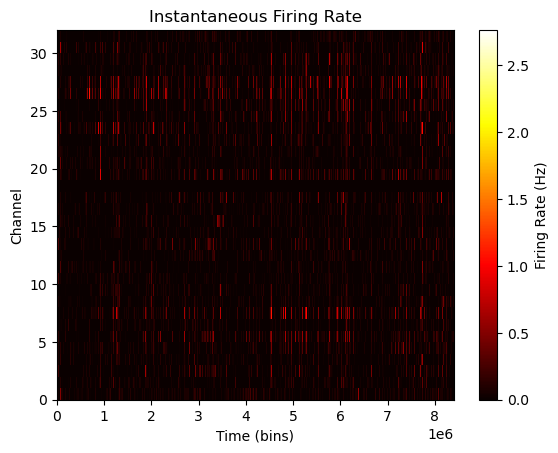

In [24]:
# Plot the heatmap
plt.imshow(firing_rate_estimates, aspect='auto', cmap='hot', interpolation='nearest', extent=[0, firing_rate_estimates.shape[1], 0, firing_rate_estimates.shape[0]])
plt.colorbar(label='Firing Rate (Hz)')
plt.ylabel('Channel')
plt.xlabel('Time (bins)')
plt.title('Instantaneous Firing Rate')
plt.show()


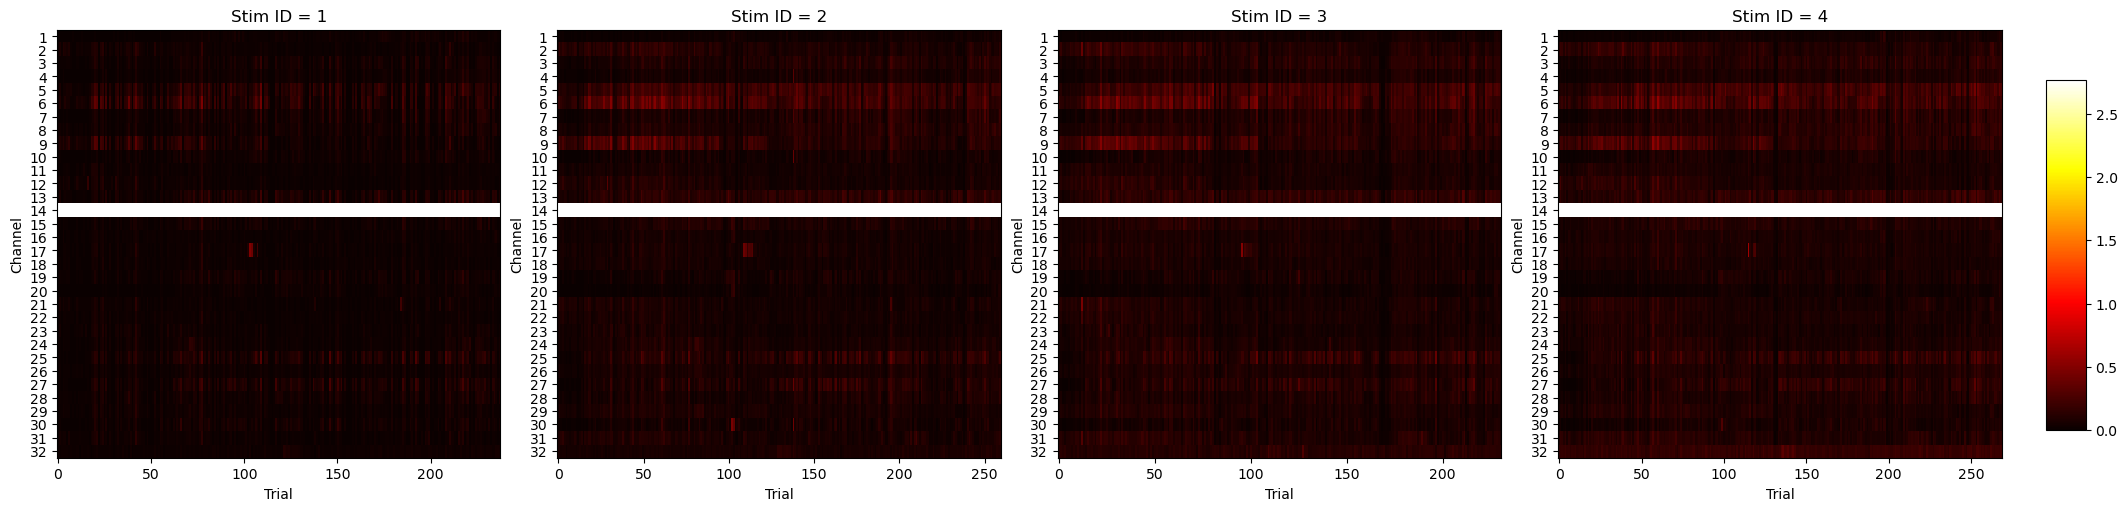

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_firing_rates2(recording_name, recording_results_df, stimulation_data_df, n_channels, firing_rate_estimates, stim_id, ax, bin_size=0.001, vmin=None, vmax=None):
    # ... (rest of your code remains the same)
    # Get the mua_data_path for the current recording to get the spike_data_path where the spike times are stored
    mua_data_path = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'mua_data_path'
    ].values[0]
    
    # Construct the spike_data_path from the mua_data_path
    spike_data_path = mua_data_path.replace('_MUA.npy', '_spike_times.npy')
    
    # Step 1: Identify the time windows for the specified stimulus_id
    stim_data = stimulation_data_df[
        (stimulation_data_df['recording_name'] == recording_name) & 
        (stimulation_data_df['stimulation_ids'] == stim_id)
    ]
    
    # Get good and noisy channels for the current recording
    good_channels = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'good_channels'
    ].values[0]

    # Step 2 & 3: Calculate and aggregate the firing rates
    firing_rates = np.full((n_channels, len(stim_data)), np.nan) # Initialize with NaNs 

    for i, (onset, offset) in enumerate(zip(stim_data['onset_times'], stim_data['offset_times'])):
        for ch in good_channels:
            # Find the bins corresponding to the current time window
            start_bin = int(onset / bin_size)
            end_bin = int(offset / bin_size)
            
            # Ensure start_bin is less than end_bin to avoid empty slices
            if start_bin < end_bin:
                # Get the firing rate estimates in the current time window
                firing_rate_in_window = firing_rate_estimates[ch, start_bin:end_bin]

                # Calculate the mean firing rate in the current time window
                firing_rate = np.nanmean(firing_rate_in_window)
                firing_rates[ch, i] = firing_rate
            else:
                print(f"Skipping trial {i} for channel {ch} due to incorrect time window.")
    
    # Step 4: Plotting the heatmap
    cax = ax.imshow(firing_rates, aspect='auto', cmap='hot', interpolation='nearest', vmin=vmin, vmax=vmax)
    ax.set_ylabel('Channel')
    ax.set_xlabel('Trial')
    ax.set_title(f'Stim ID = {stim_id}')
    ax.set_yticks(range(n_channels))
    ax.set_yticklabels(range(1, n_channels+1))  # Label y-axis with channel numbers

    return cax  # returning the image object for later use in colorbar

# Find the global minimum and maximum firing rate values
global_min = np.nanmin(firing_rate_estimates)
global_max = np.nanmax(firing_rate_estimates)

# Setting up the subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), constrained_layout=True)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])  # Adjusted the first parameter to move the colorbar to the right

# Looping over stim_id to plot the heatmaps
for stim_id in range(1, 5):
    ax = axs[stim_id - 1]  # Get the correct axes
    cax = calculate_firing_rates2('lmc_ch_2_3093_rec1', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels, firing_rate_estimates, stim_id=stim_id, ax=ax, bin_size=0.001, vmin=global_min, vmax=global_max)

# Adding a colorbar
fig.colorbar(cax, cax=cbar_ax)
    


# You would call this function after calling estimate_instantaneous_firing_rate to get firing_rate_estimates
#loop over 1 to 4 for stim_id
#for stim_id in range(1, 5):
#    calculate_firing_rates2('lmc_ch_2_3093_rec1', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels, firing_rate_estimates, stim_id=stim_id, bin_size=0.001)
#calculate_firing_rates2('lmc_ch_2_3093_rec1', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels, firing_rate_estimates, stim_id=1, bin_size=0.001)

In [ ]:
#loop through each unique recording name in the recording_results_df
for recording_name in analysis.recording_results_df['recording_name'].unique():
    firing_rate_estimates = estimate_instantaneous_firing_rate(recording_name, analysis.recording_results_df, analysis.n_channels)
    # Find the global minimum and maximum firing rate values
    global_min = np.nanmin(firing_rate_estimates)
    global_max = np.nanmax(firing_rate_estimates)
    
    # Setting up the subplots
    fig, axs = plt.subplots(1, 4, figsize=(20, 5), constrained_layout=True)
    cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])  # Adjusted the first parameter to move the colorbar to the right
    
    # Looping over stim_id to plot the heatmaps for each unique recording name
    for stim_id in range(1, 5):
        ax = axs[stim_id - 1]  # Get the correct axes
        cax = calculate_firing_rates2(recording_name, analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels, firing_rate_estimates, stim_id=stim_id, ax=ax, bin_size=0.001, vmin=global_min, vmax=global_max)
        print(recording_name)
    
    # Adding a colorbar
    cbar = fig.colorbar(cax, cax=cbar_ax)
    cbar.set_label('Firing Rate (Hz)', rotation=270, labelpad=15)
    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_psth(recording_name, recording_results_df, stimulation_data_df, n_channels, firing_rate_estimates, stim_id, bin_size=0.001):
    
    # Get the mua_data_path for the current recording to get the spike_data_path where the spike times are stored
    mua_data_path = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'mua_data_path'
    ].values[0]
    
    # Construct the spike_data_path from the mua_data_path
    spike_data_path = mua_data_path.replace('_MUA.npy', '_spike_times.npy')
    
    # Step 1: Identify the time windows for the specified stimulus_id
    stim_data = stimulation_data_df[
        (stimulation_data_df['recording_name'] == recording_name) & 
        (stimulation_data_df['stimulation_ids'] == stim_id)
    ]
    
    # Get good and noisy channels for the current recording
    good_channels = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'good_channels'
    ].values[0]

    # Find the minimum onset and maximum offset times to get a common time window for all trials
    min_onset = stim_data['onset_times'].min() - 0.5  # 500 ms before the minimum onset
    max_offset = stim_data['offset_times'].max() + 0.5  # 500 ms after the maximum offset

    # Find the bins corresponding to the common time window
    start_bin = int(min_onset / bin_size)
    end_bin = int(max_offset / bin_size)

    # Initialize arrays to accumulate the sums and counts for each bin
    sum_psth = np.zeros((n_channels, end_bin - start_bin))
    count_psth = np.zeros((n_channels, end_bin - start_bin))

    # Loop through each trial to calculate the PSTH
    for i, (onset, offset) in enumerate(zip(stim_data['onset_times'], stim_data['offset_times'])):
        # Find the bins corresponding to the current time window
        trial_start_bin = int((onset - 0.5) / bin_size)
        trial_end_bin = int((offset + 0.5) / bin_size)

        # Add the firing rate estimates to the sum and update the count in the relevant bins
        sum_psth[:, trial_start_bin - start_bin : trial_end_bin - start_bin] += firing_rate_estimates[:, trial_start_bin:trial_end_bin]
        count_psth[:, trial_start_bin - start_bin : trial_end_bin - start_bin] += 1
    
    # Calculate the mean PSTH by dividing the sum by the count
    mean_psth = np.divide(sum_psth, count_psth, where=(count_psth!=0))

    # Plotting the mean PSTH for each channel
    time_bins = np.linspace(min_onset, max_offset, end_bin - start_bin)
    plt.figure()
    for ch in good_channels:
        plt.plot(time_bins, mean_psth[ch, :])
    
    plt.xlabel('Time (s)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title(f'Mean PSTH for Stimulus ID = {stim_id}')
    plt.show()

#first get the firing rate estimates for the recording name
firing_rate_estimates = estimate_instantaneous_firing_rate('lmc_ch_2_3093_rec1', analysis.recording_results_df, analysis.n_channels)
#run the function 
calculate_psth('lmc_ch_2_3093_rec1', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels, firing_rate_estimates, stim_id=1, bin_size=0.001)

In [ ]:
def calculate_psth(recording_name, recording_results_df, stimulation_data_df, n_channels, firing_rate_estimates, stim_id=1, bin_size=0.001):
    # Get the mua_data_path for the current recording
    mua_data_path = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'mua_data_path'
    ].values[0]
    
    # Step 1: Identify the time windows for the specified stimulus_id
    stim_data = stimulation_data_df[
        (stimulation_data_df['recording_name'] == recording_name) & 
        (stimulation_data_df['stimulation_ids'] == stim_id)
    ]
    
    # Get good and noisy channels for the current recording
    good_channels = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'good_channels'
    ].values[0]
    noisy_channels = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'noisy_channels'
    ].values[0]

    # Exclude noisy channels from good channels
    good_channels = [ch for ch in good_channels if ch not in noisy_channels]

    # Step 2 & 3: Aggregate the PSTH data
    psth_duration_in_s = 1.5  # PSTH duration in seconds (1500 ms)
    num_bins = int(psth_duration_in_s / bin_size)
    sum_psth = np.zeros((n_channels, num_bins))  # Initialize with zeros
    count_psth = np.zeros((n_channels, num_bins))  # Initialize with zeros

    for i, (onset, offset) in enumerate(zip(stim_data['onset_times'], stim_data['offset_times'])):
        for ch in good_channels:
            # Find the bins corresponding to the current time window (from -500ms to +1000ms relative to the onset)
            start_bin = int((onset - 0.5) / bin_size)
            end_bin = int((onset + 1.0) / bin_size)
            
            # within your loop where you extract trial_psth
            trial_psth = firing_rate_estimates[ch, start_bin:end_bin][:1500]
            
            # Accumulate the PSTH data
            sum_psth[ch, :] += np.nan_to_num(trial_psth)
            count_psth[ch, :] += np.isfinite(trial_psth)

    # Calculate the mean PSTH by dividing the sum by the count
    mean_psth = np.divide(sum_psth, count_psth, where=(count_psth!=0))
    
    # Convert firing rate from spikes per bin to spikes per second (Hz)
    mean_psth /= bin_size

    # Create a time axis that spans from -500 ms to +1000 ms
    time_axis = np.linspace(-500, 1000, num_bins)

    # Step 4: Plotting the mean PSTH for each channel
    plt.figure()
    for ch in range(n_channels):
        plt.plot(time_axis, mean_psth[ch, :])
        plt.xlabel('Time (ms)')
        plt.ylabel('Firing Rate (Hz)')
        plt.title(f'Channel {ch+1}')
        plt.axvline(x=0, color='r', linestyle='--')  # Mark stimulus onset
        plt.axvline(x=500, color='r', linestyle='--')  # Mark stimulus offset
        plt.show()

#run the function with the firing rate estimates
calculate_psth('lmc_ch_2_3093_rec1', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels, firing_rate_estimates, stim_id=2, bin_size=0.001)

In [ ]:
def calculate_psth(recording_name, recording_results_df, stimulation_data_df, n_channels, firing_rate_estimates, bin_size=0.001):
    # Get good and noisy channels for the current recording
    good_channels = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'good_channels'
    ].values[0]
    noisy_channels = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'noisy_channels'
    ].values[0]
    
    
    # Exclude noisy channels from good channels
    good_channels = [ch for ch in good_channels if ch not in noisy_channels]

    # Define time vector based on bin_size and window length
    t = np.arange(-0.5, 1.0, bin_size) # Adjust as necessary

    # Create a figure
    # Create a figure with increased size
    plt.figure(figsize=(18, 14))

    for stim_id in range(1, 5):
        # Step 1: Identify the time windows for the specified stimulus_id
        stim_data = stimulation_data_df[
            (stimulation_data_df['recording_name'] == recording_name) & 
            (stimulation_data_df['stimulation_ids'] == stim_id)
        ]
        
        # Considering only the first 30 trials, you can change this as necessary to see more trials
        # stim_data = stim_data.iloc[:-30]
        
        sum_psth = np.zeros((n_channels, len(t)-1)) # Initialize sum and count with zeros
        count_psth = np.zeros((n_channels, len(t)-1))
        
        for i, (onset, offset) in enumerate(zip(stim_data['onset_times'], stim_data['offset_times'])):
            for ch in good_channels:
                # Find the bins corresponding to the current time window
                start_bin = int((onset - 0.5) / bin_size)
                end_bin = start_bin + len(t) - 1

                # Get the firing rate estimates in the current time window
                trial_psth = firing_rate_estimates[ch, start_bin:end_bin]

                # Accumulate the PSTH data
                sum_psth[ch, :] += np.nan_to_num(trial_psth)
                count_psth[ch, :] += np.isfinite(trial_psth)
        
        # Calculate the mean PSTH by dividing the sum by the count
        mean_psth = np.divide(sum_psth, count_psth, where=(count_psth!=0))
        
        # Convert firing rate from spikes per bin to spikes per second (Hz)
        mean_psth /= bin_size

        for ch in range(n_channels):
            if ch not in good_channels:
                continue

            # Plotting the mean PSTH for each channel
            plt.subplot(6, 6, ch + 1) # Adjust subplot grid as necessary
            plt.plot(t[:-1], mean_psth[ch, :], label=f'Stim ID = {stim_id}')
            plt.title(f'Channel {ch+1}')

    # Adding legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust space between subplots
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()
    


#run the function with the firing rate estimates
calculate_psth('lmc_ch_2_3093_rec1', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels, firing_rate_estimates, bin_size=0.001)

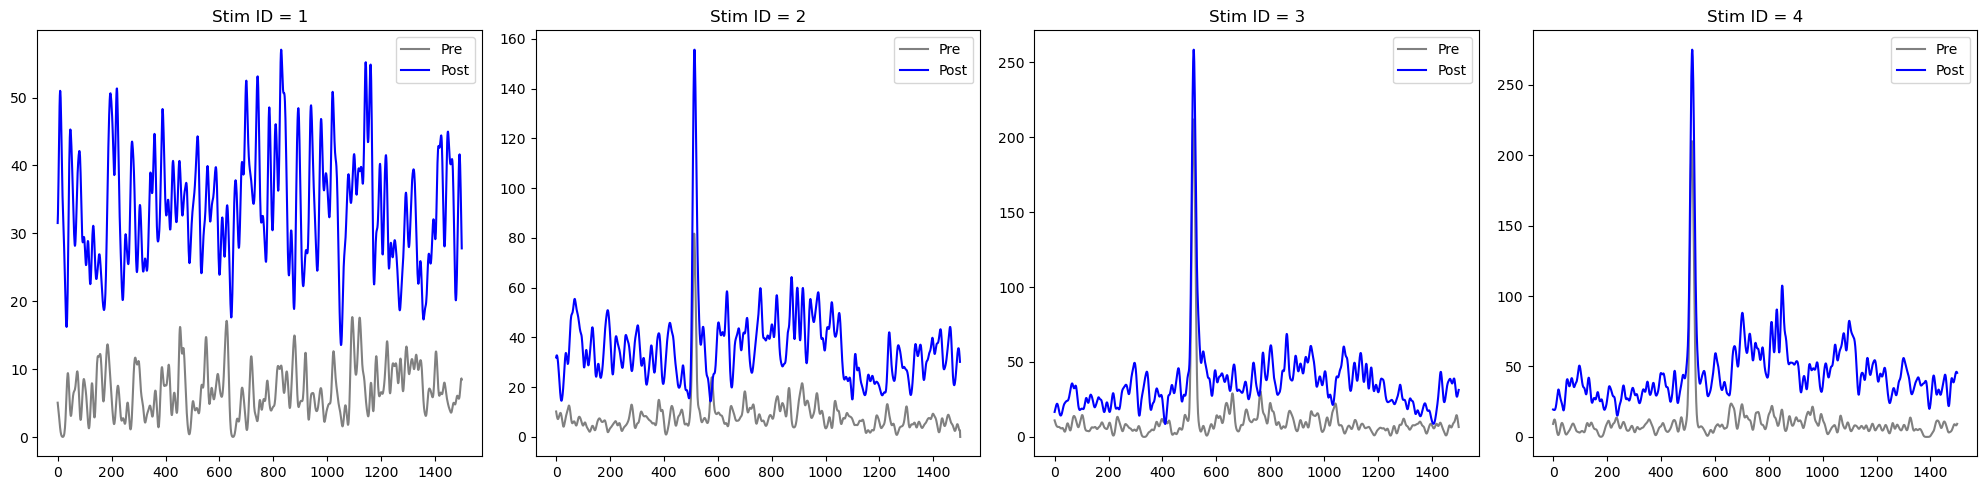

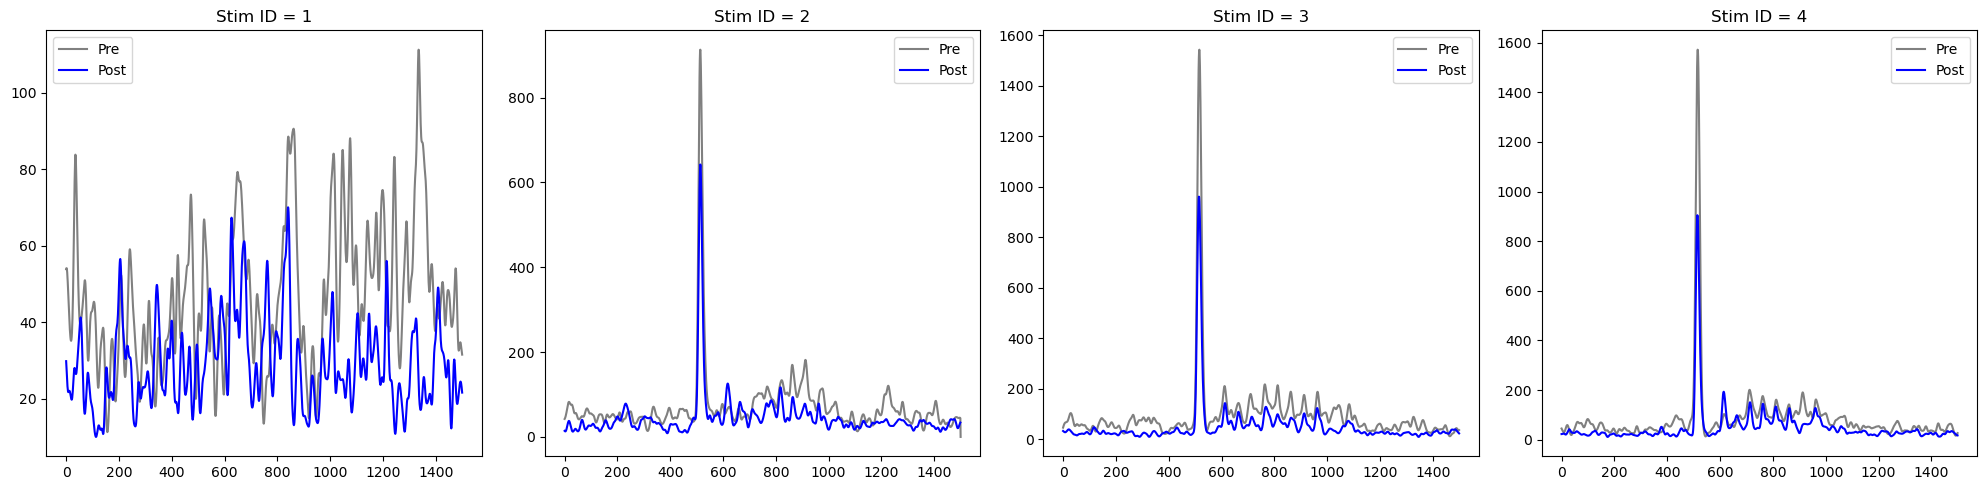

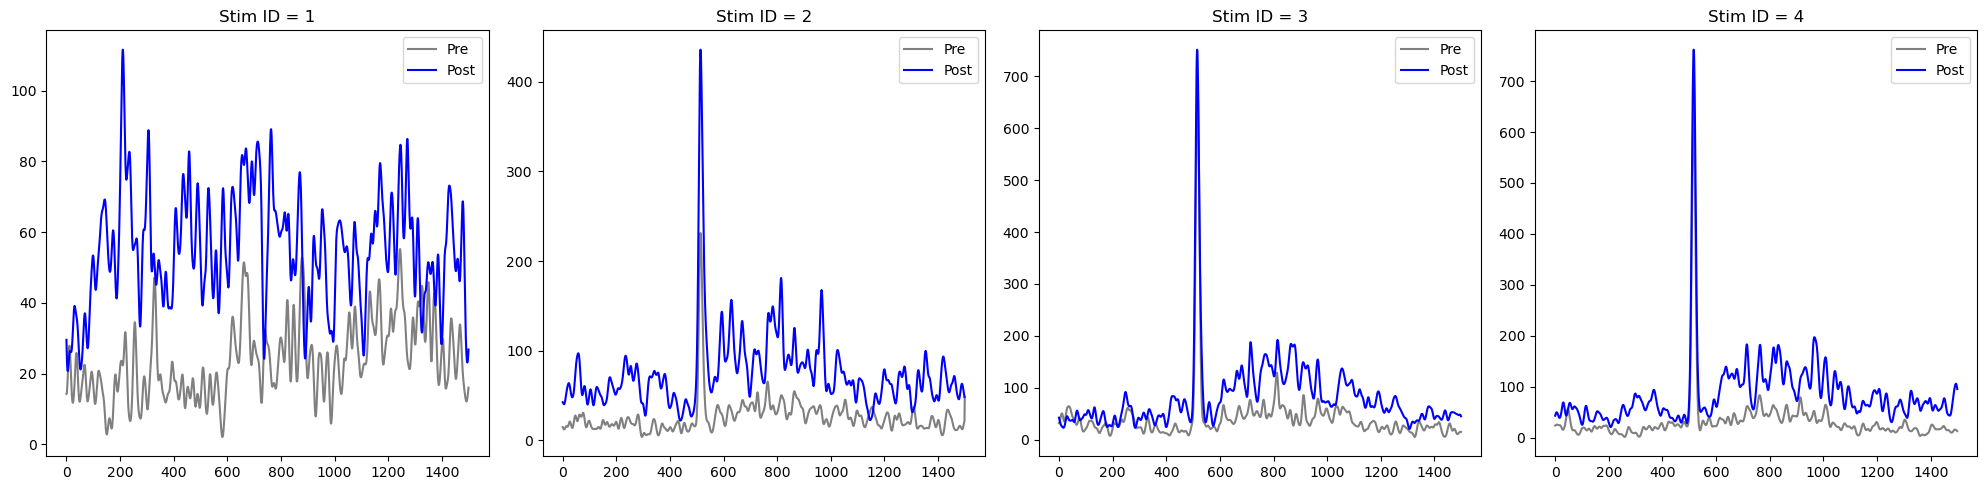

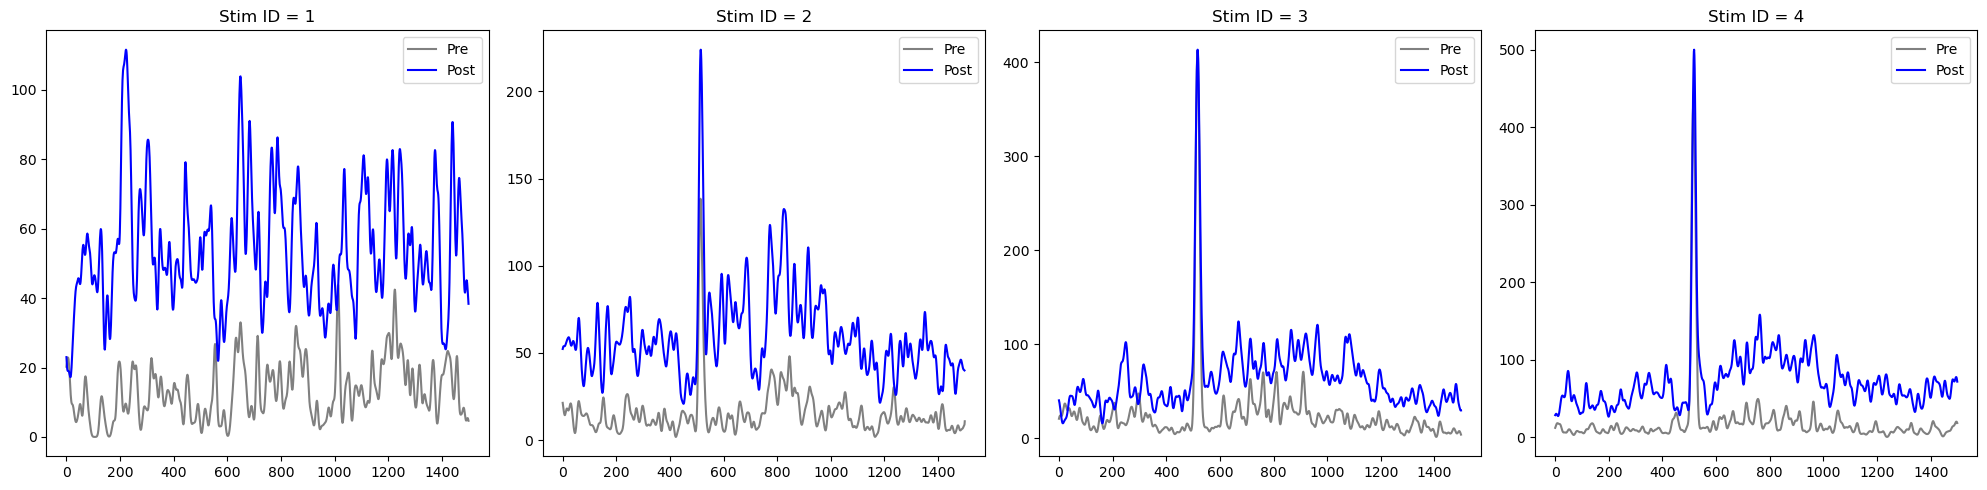

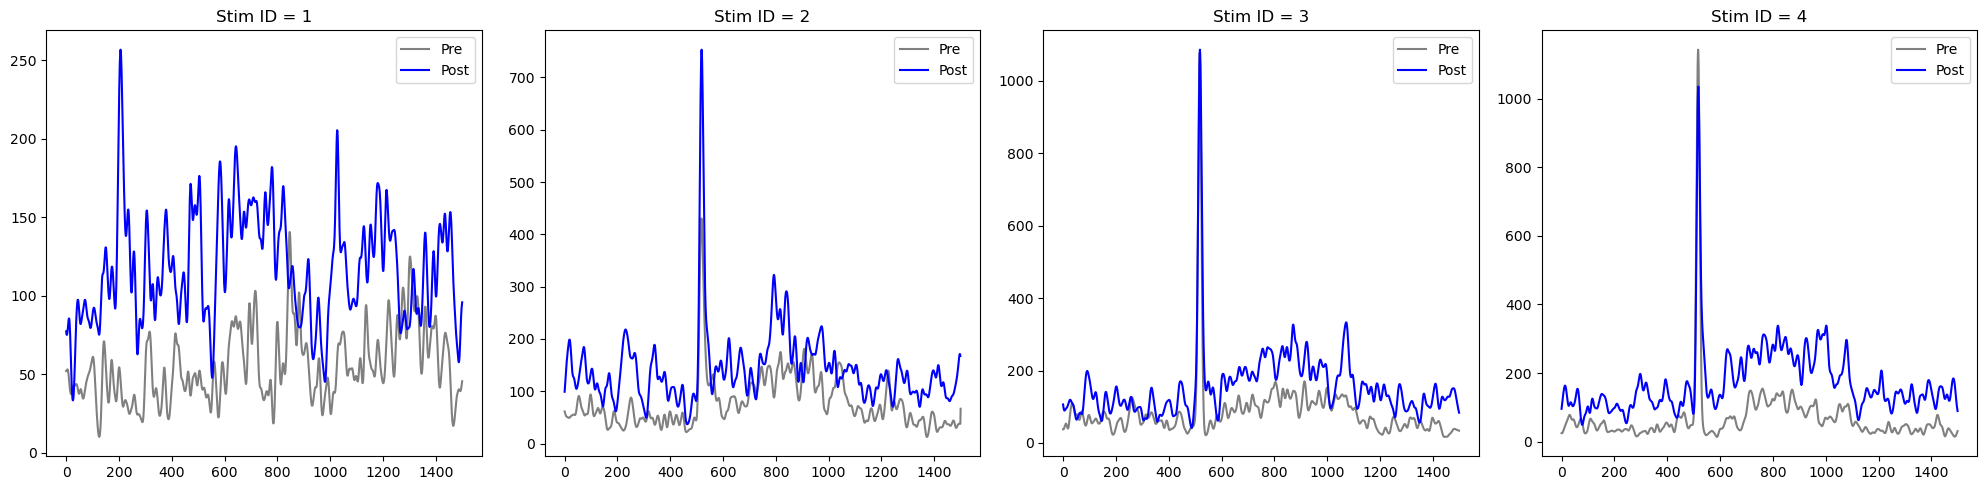

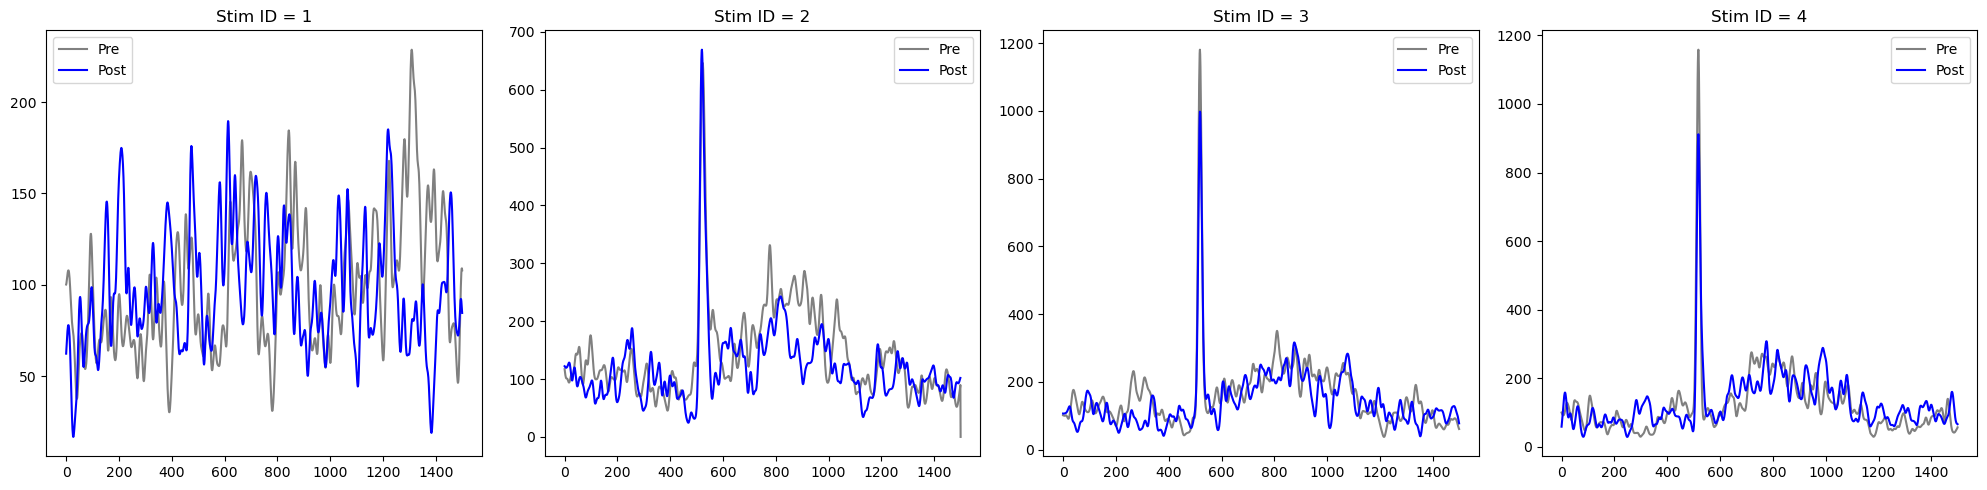

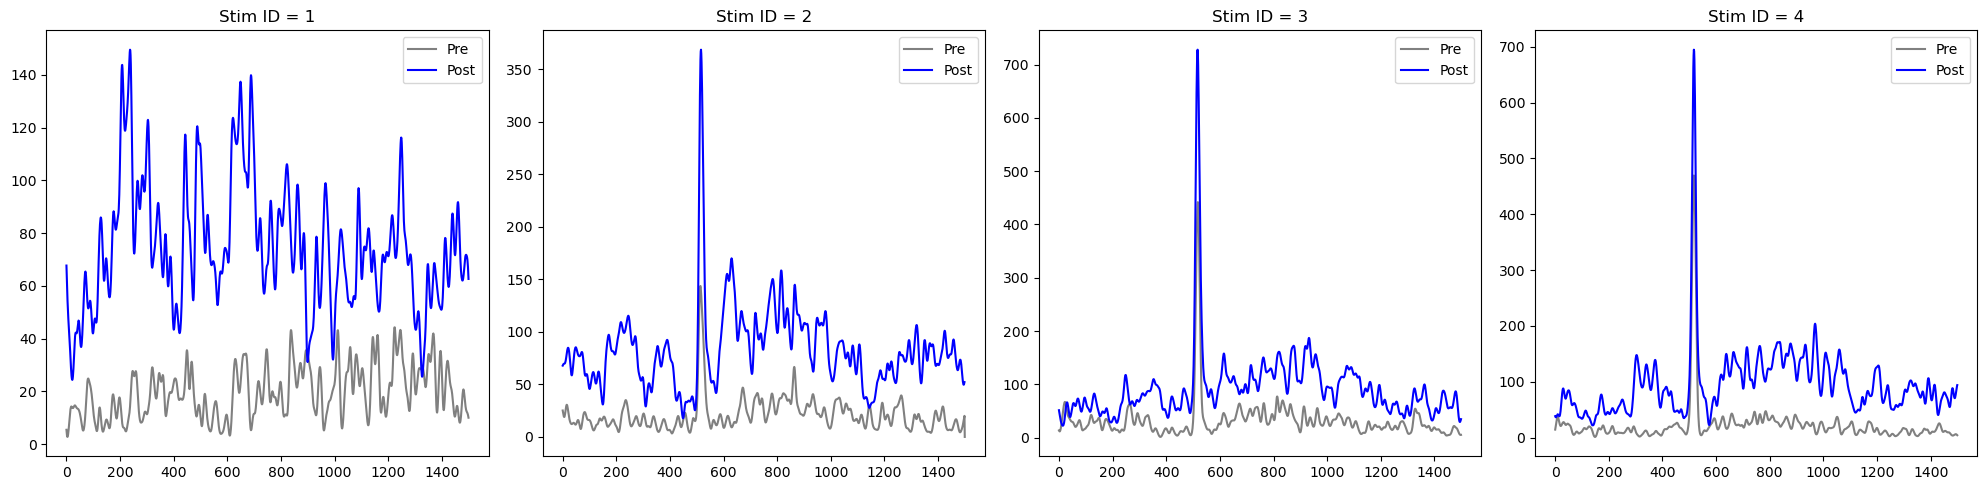

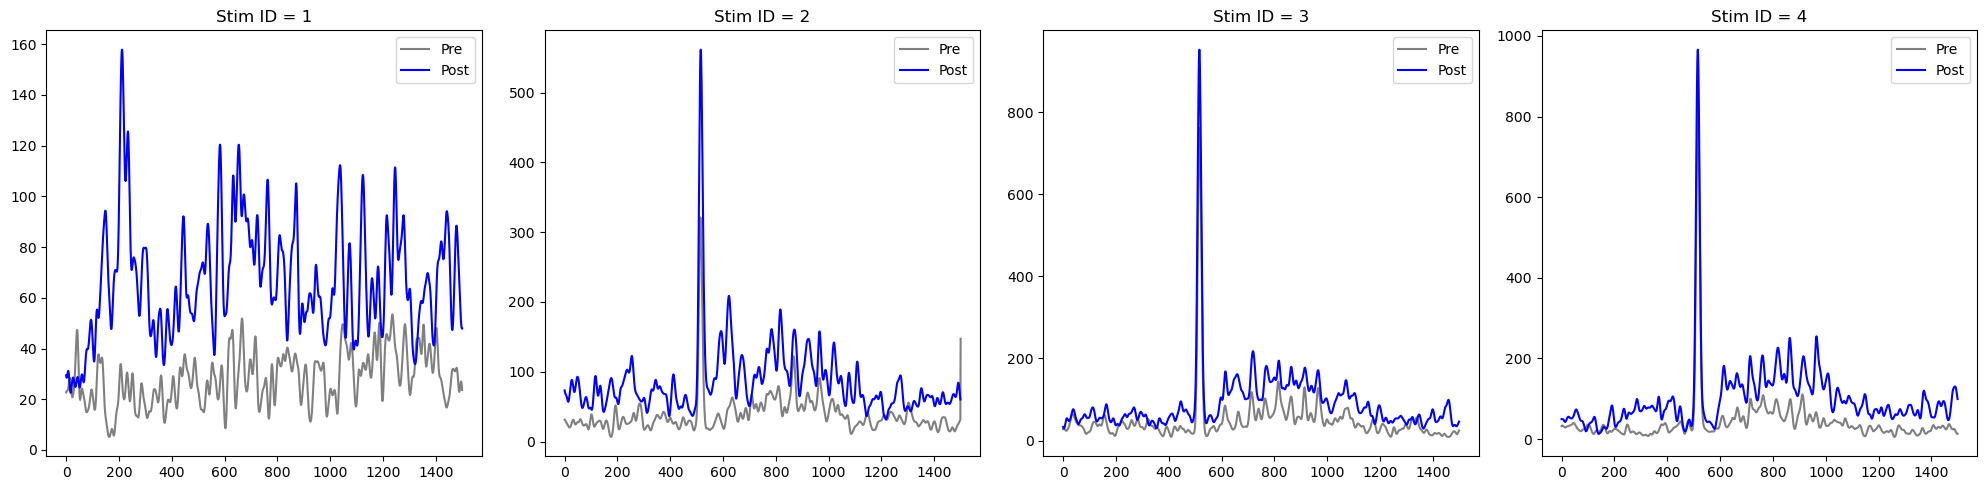

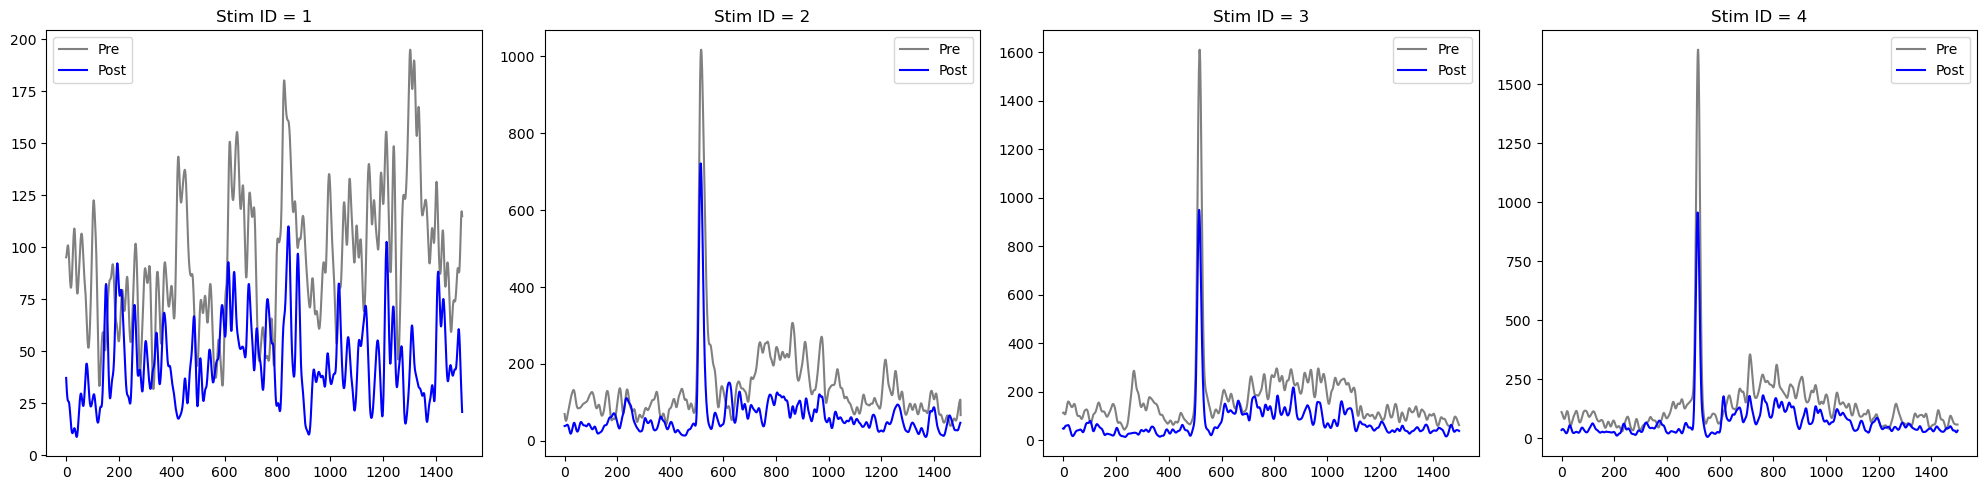

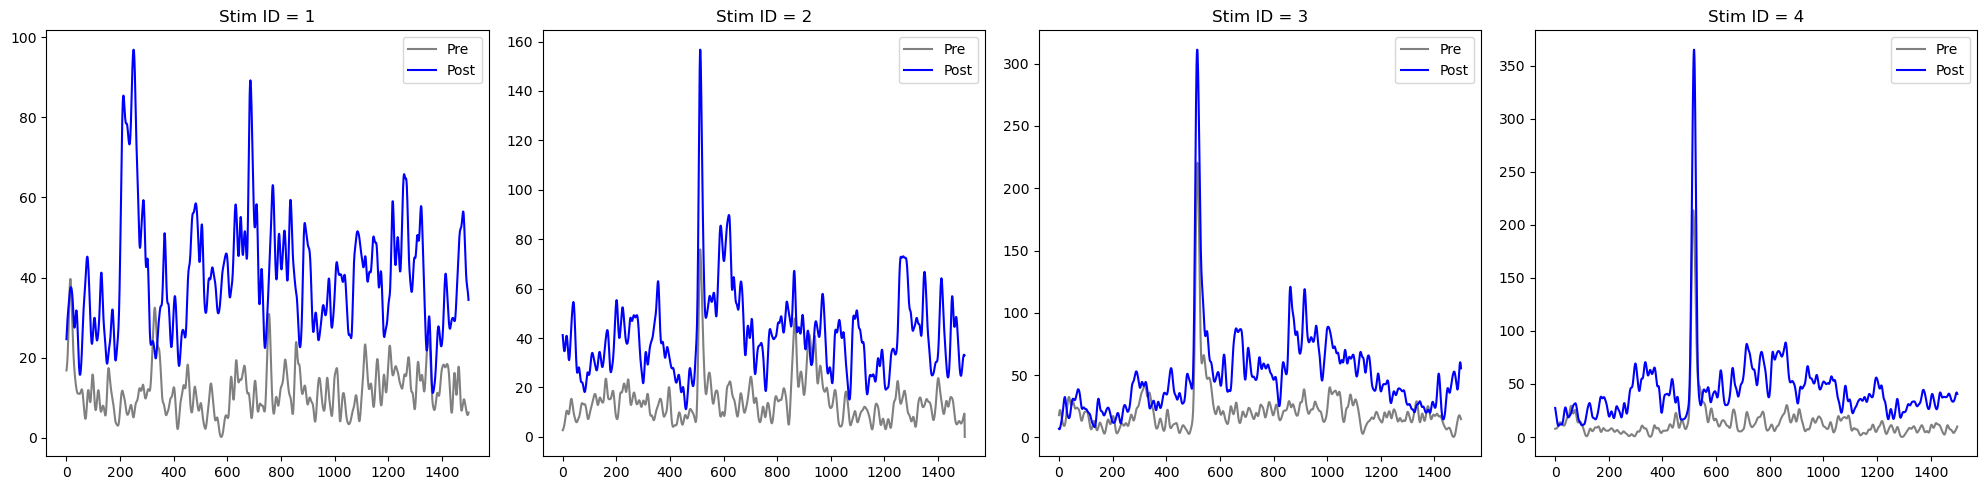

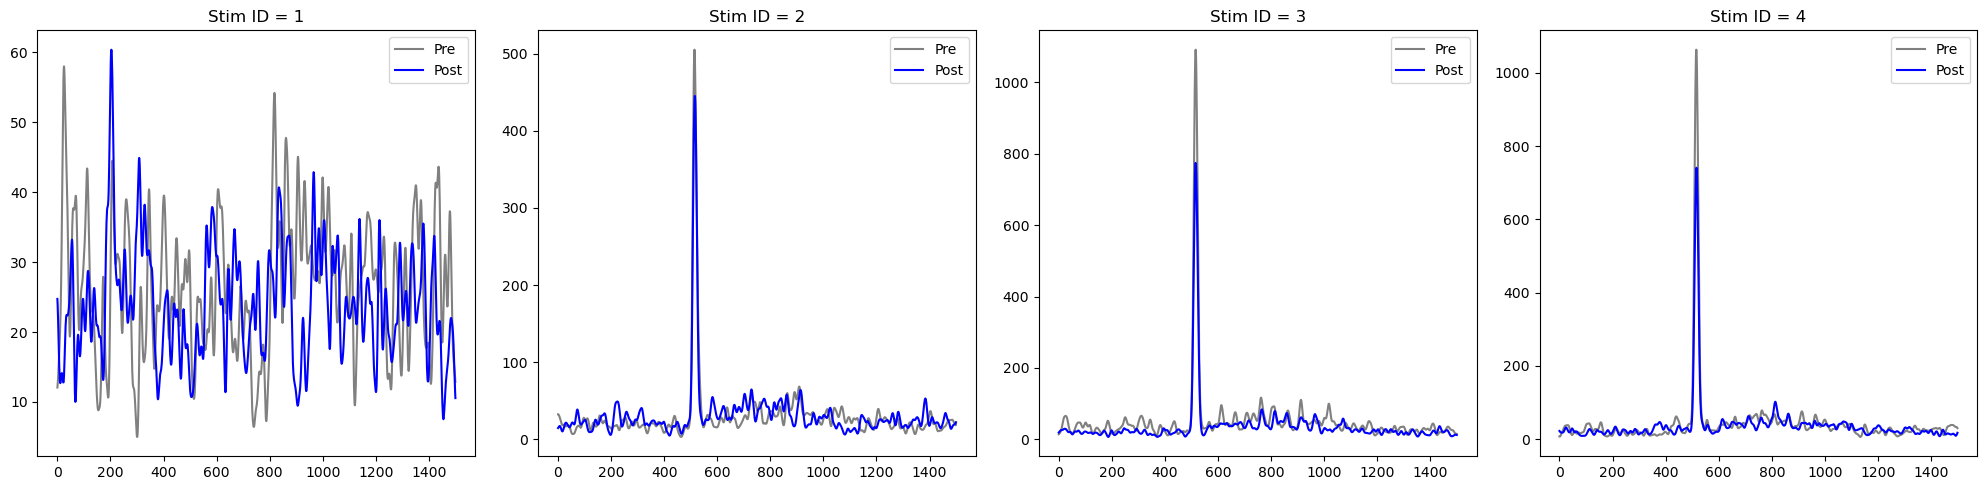

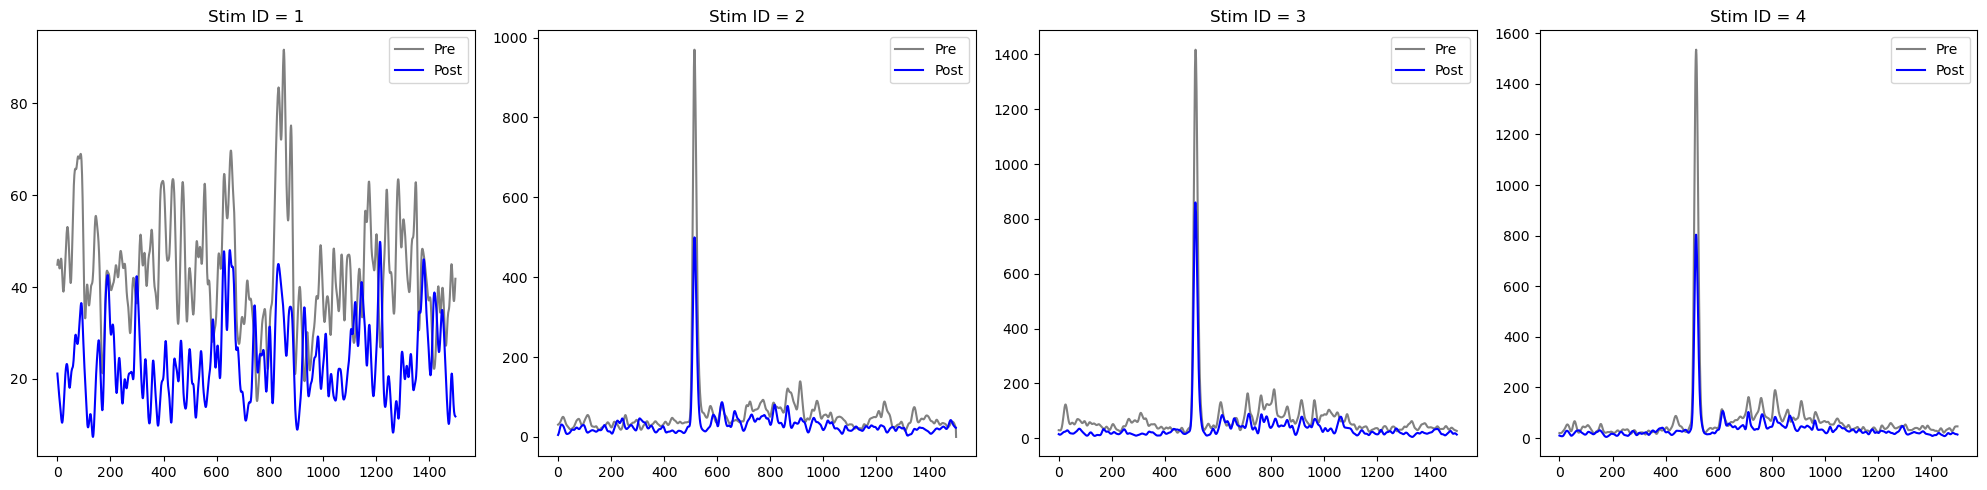

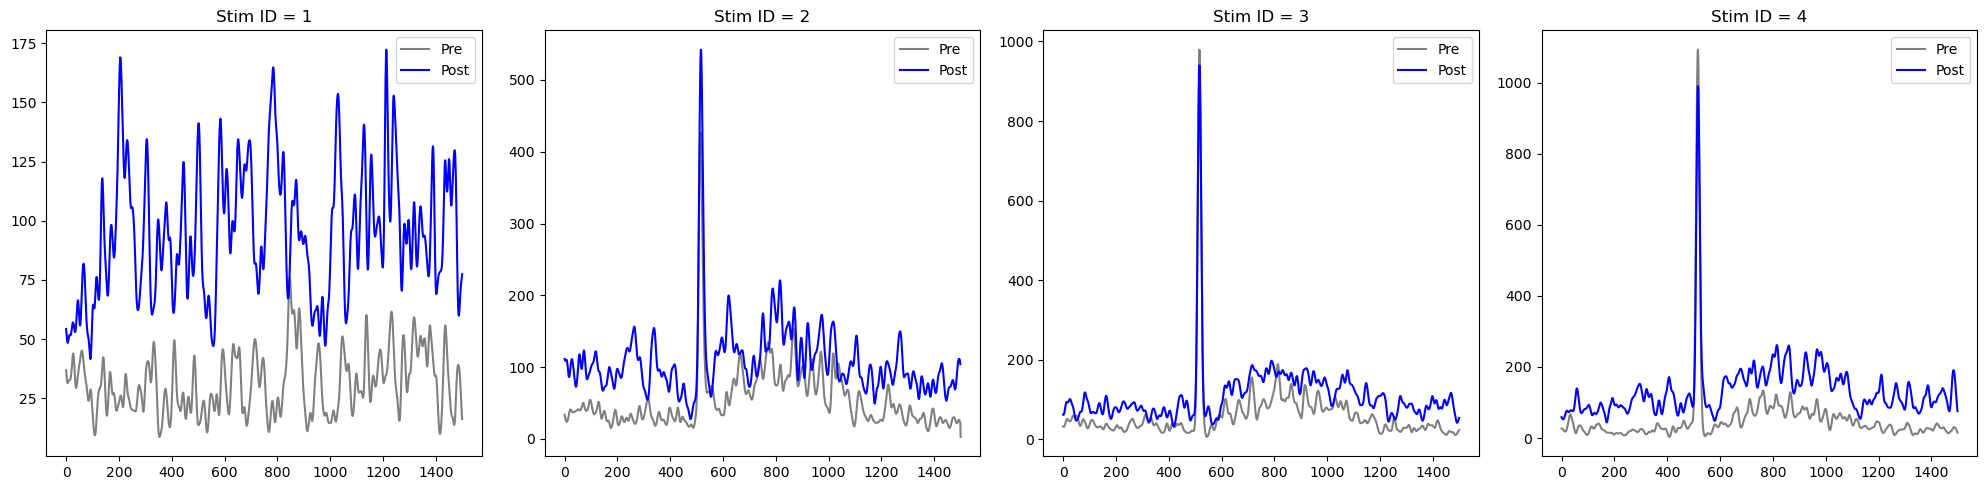

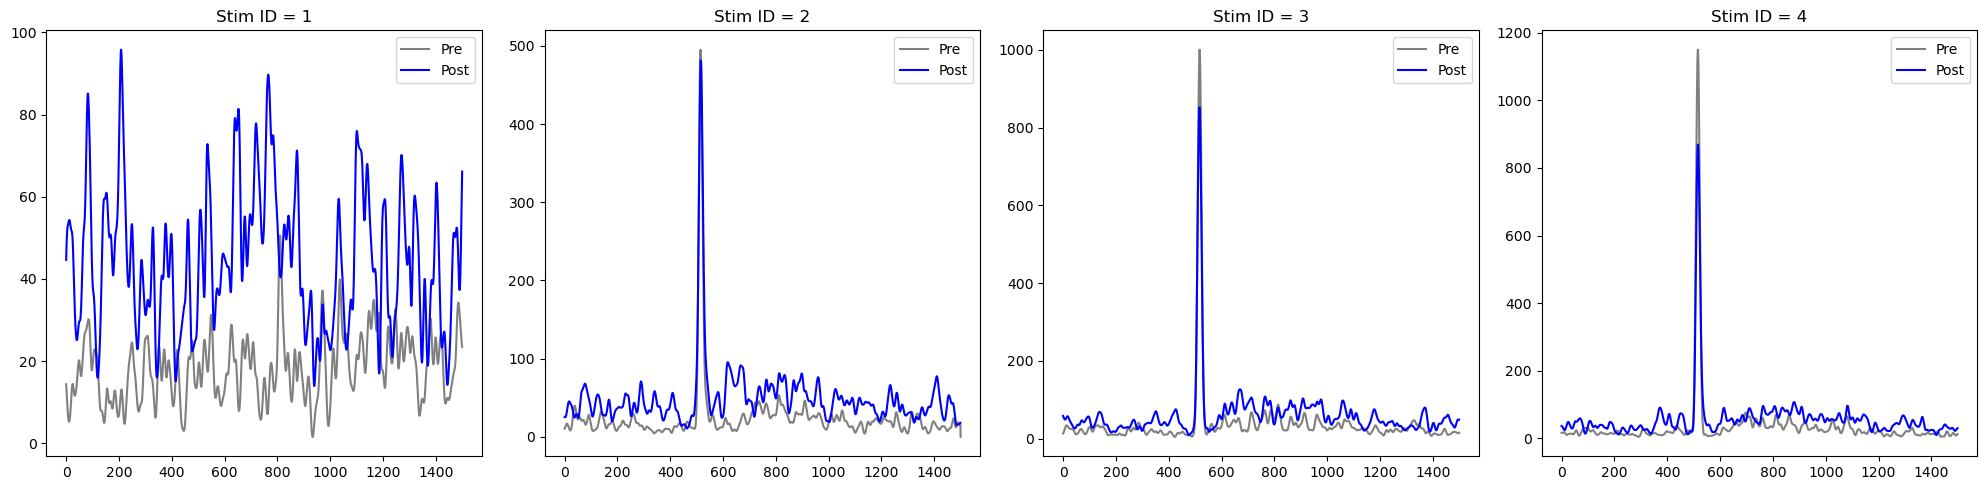

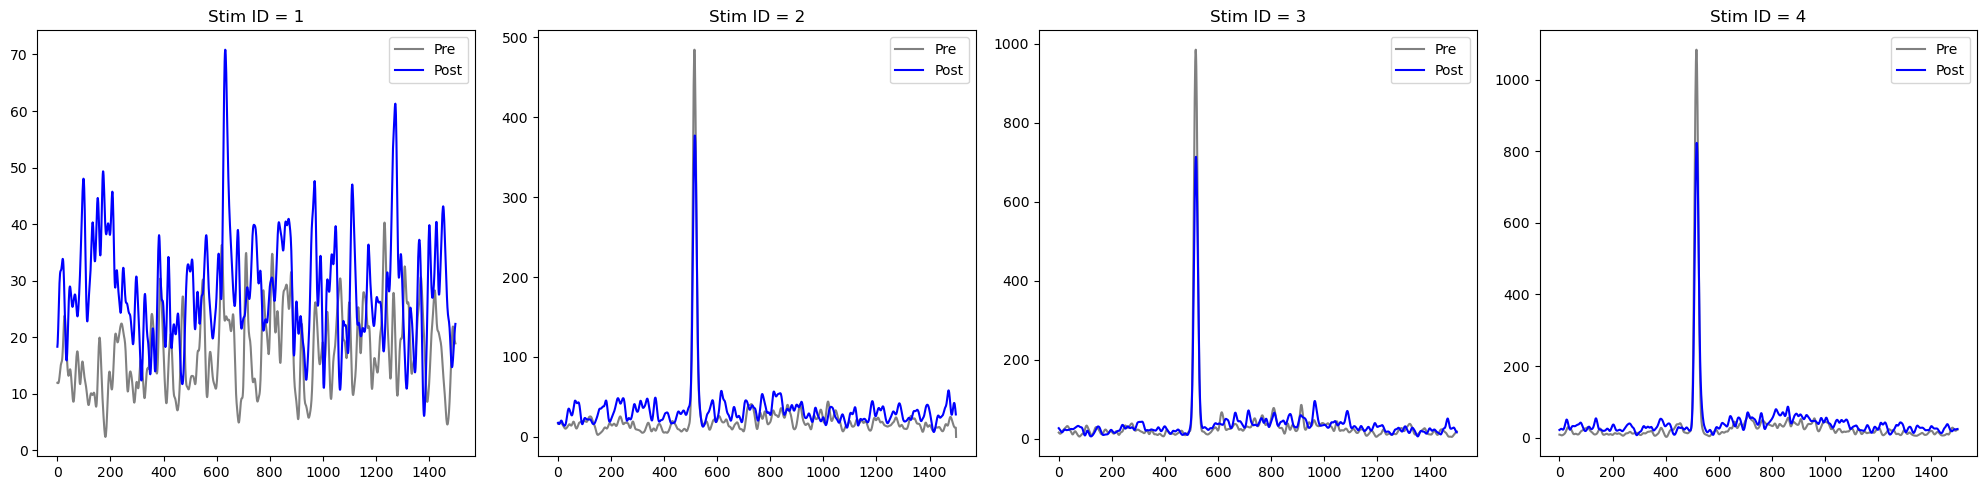

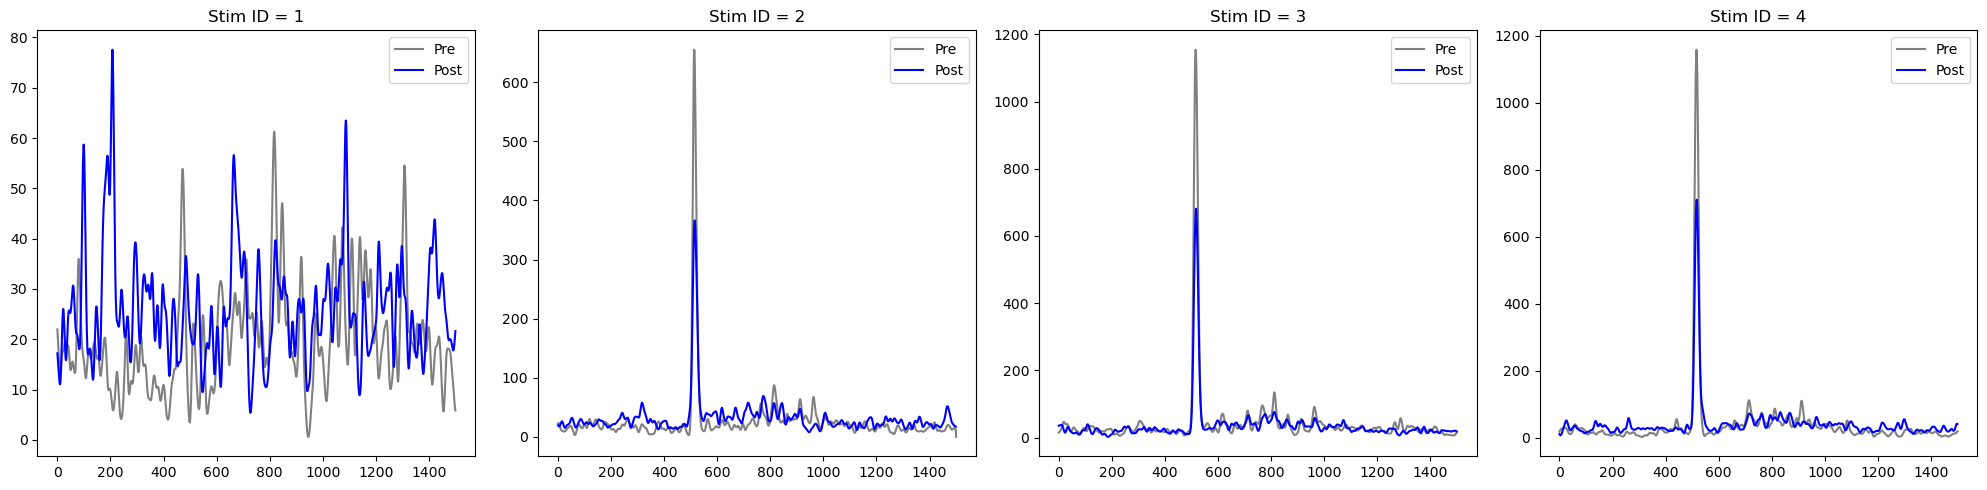

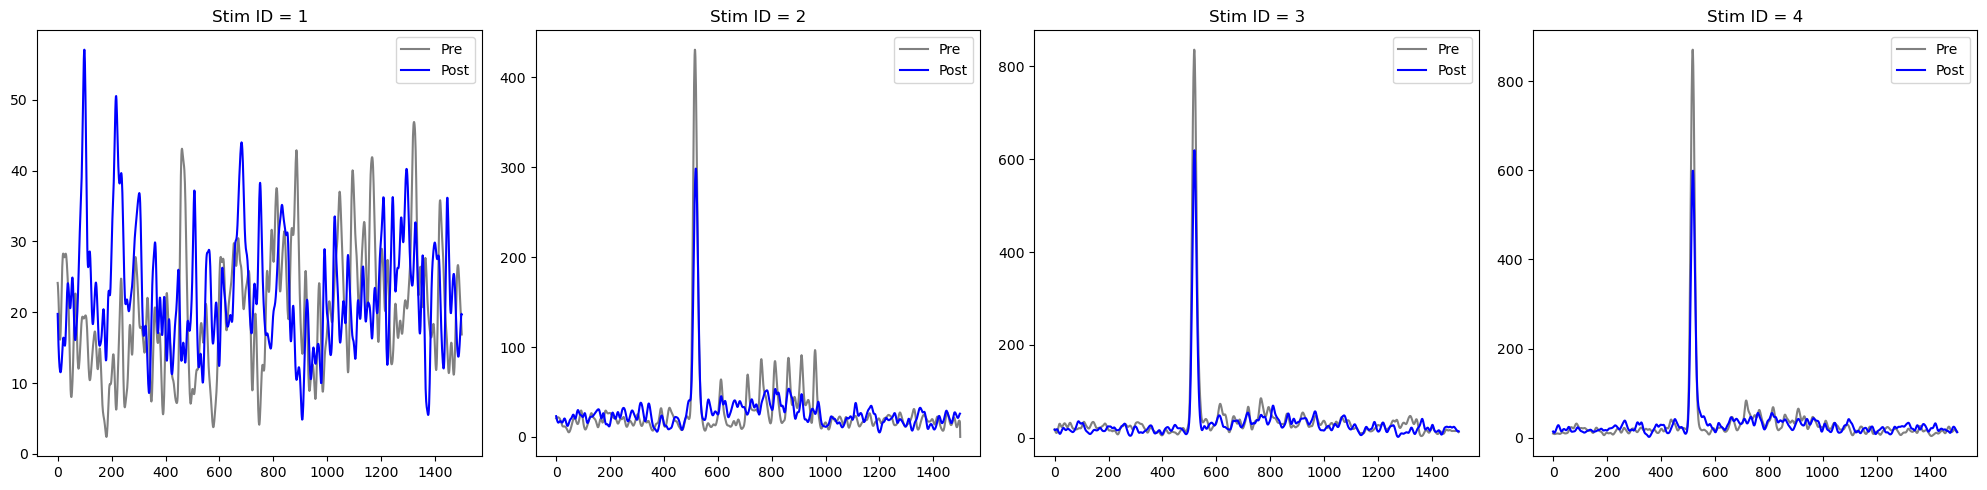

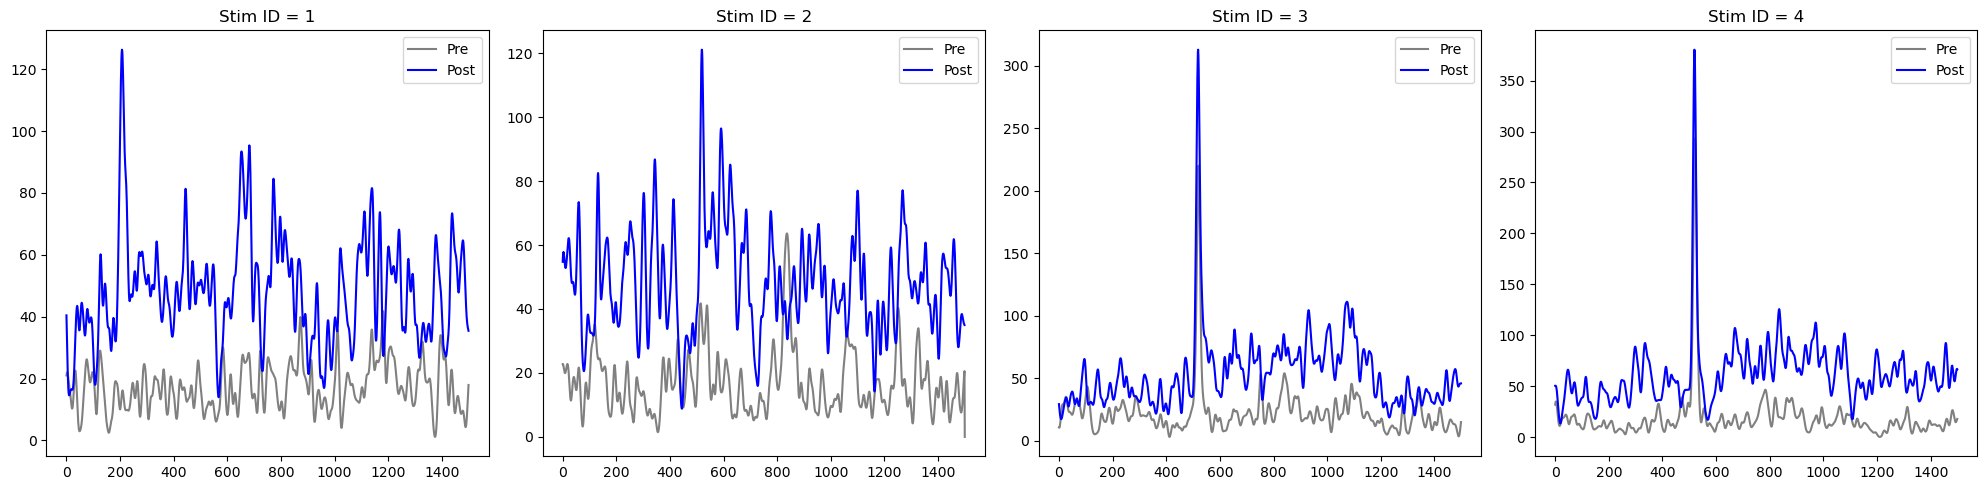

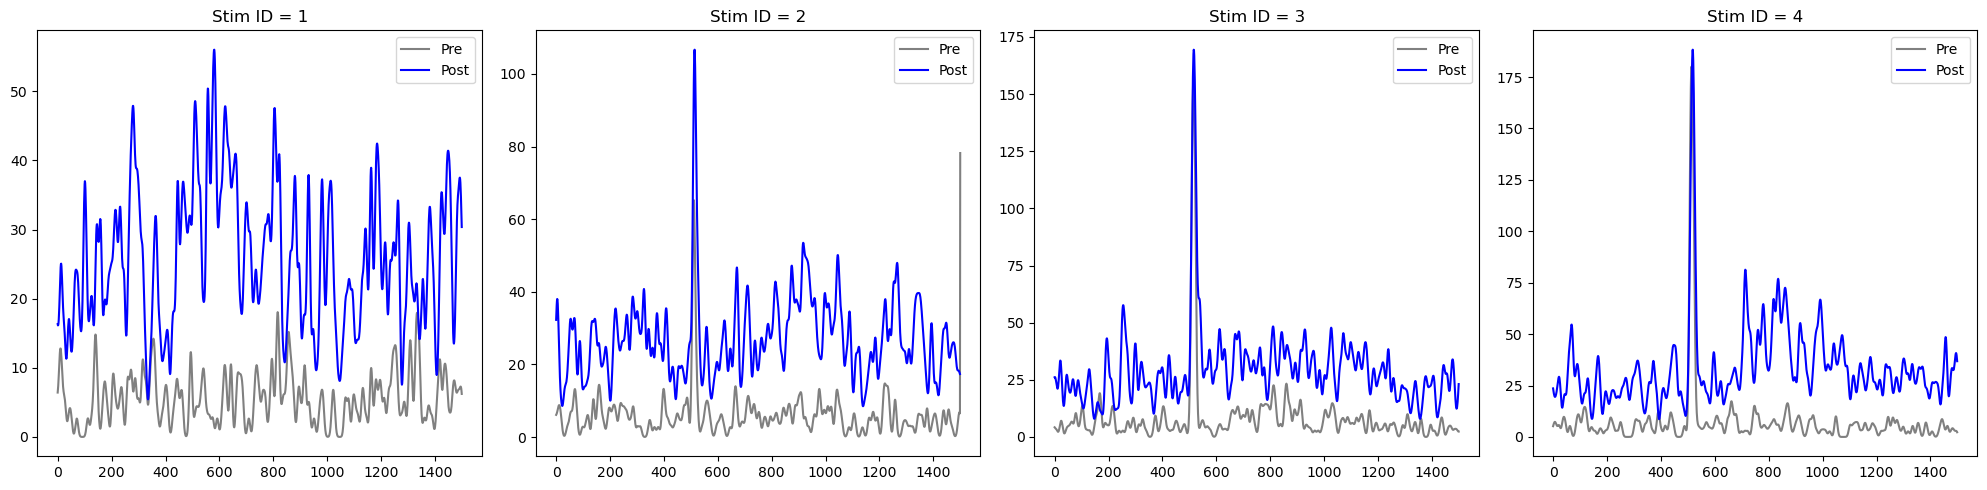

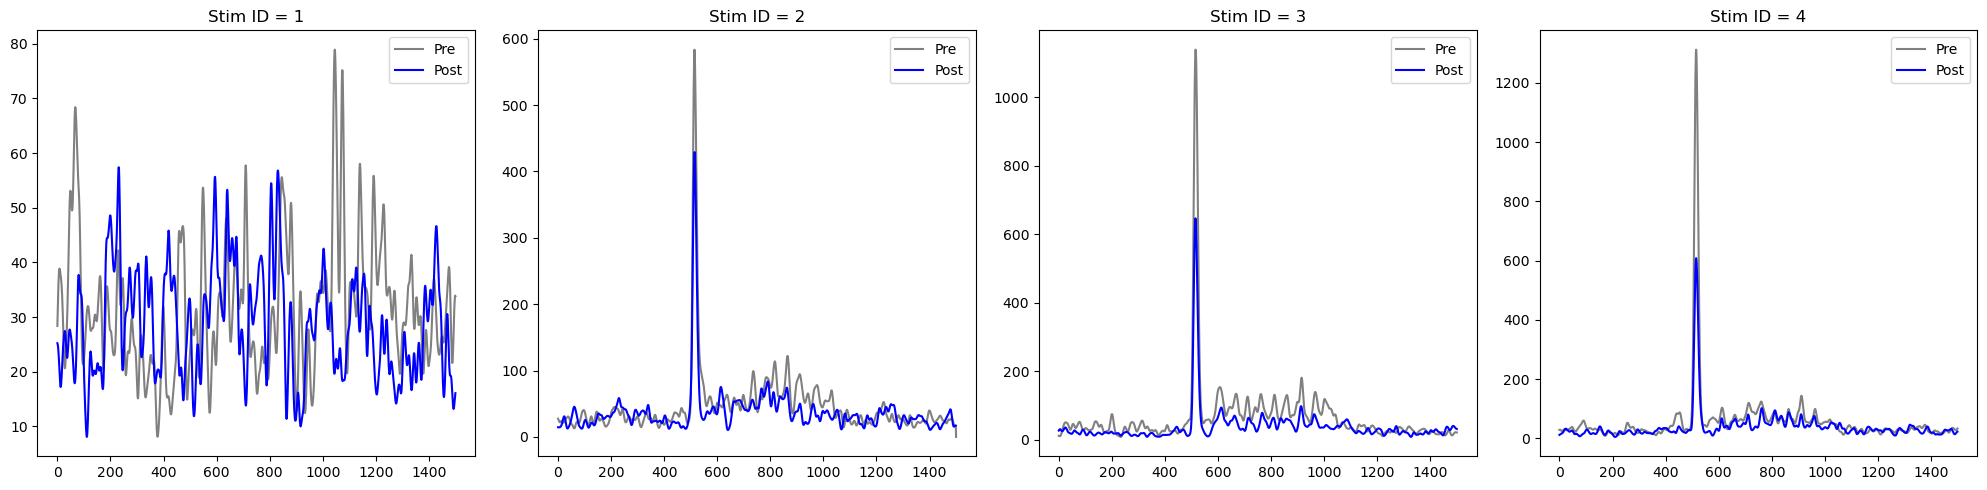

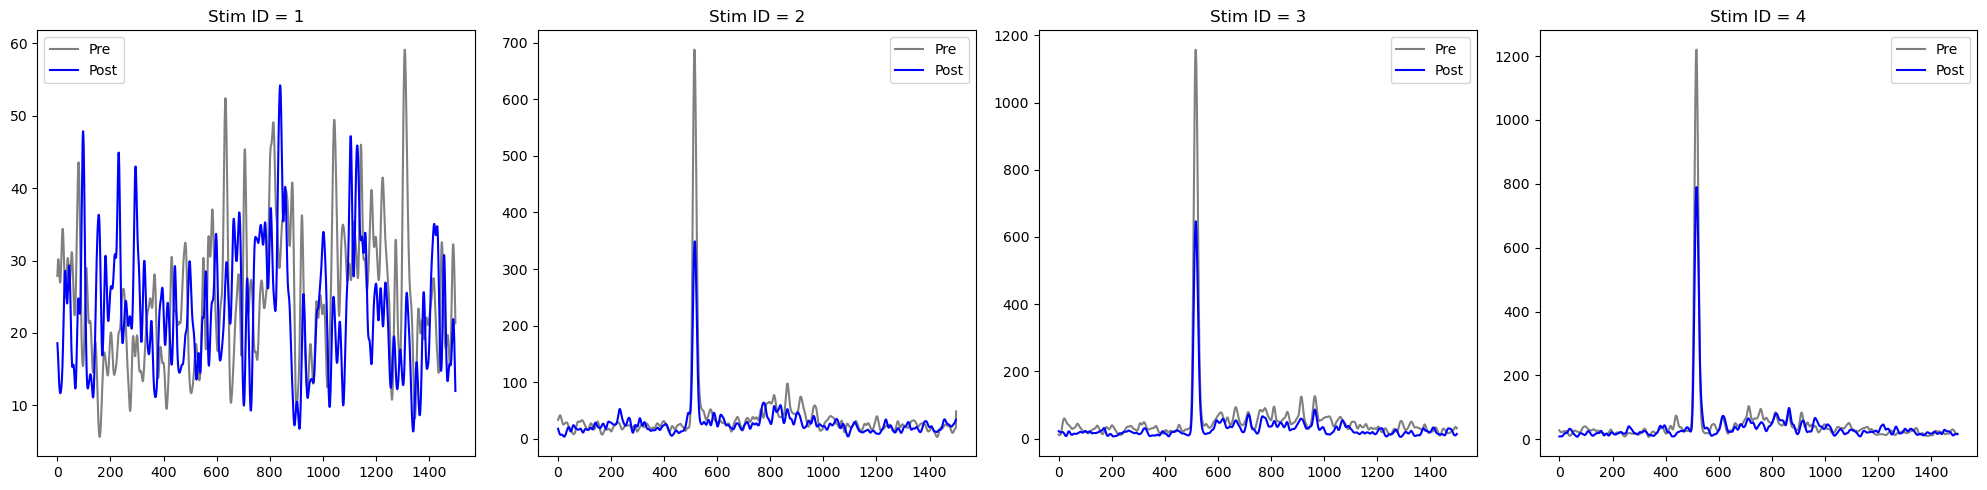

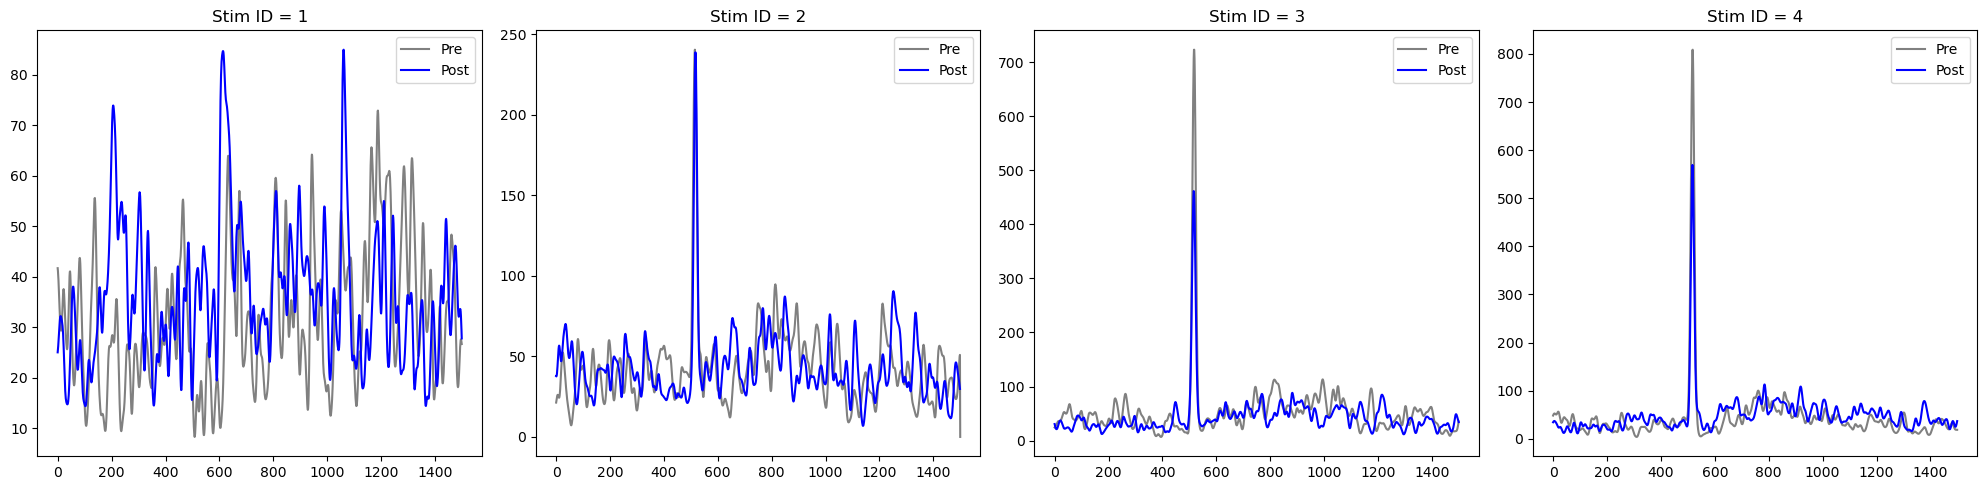

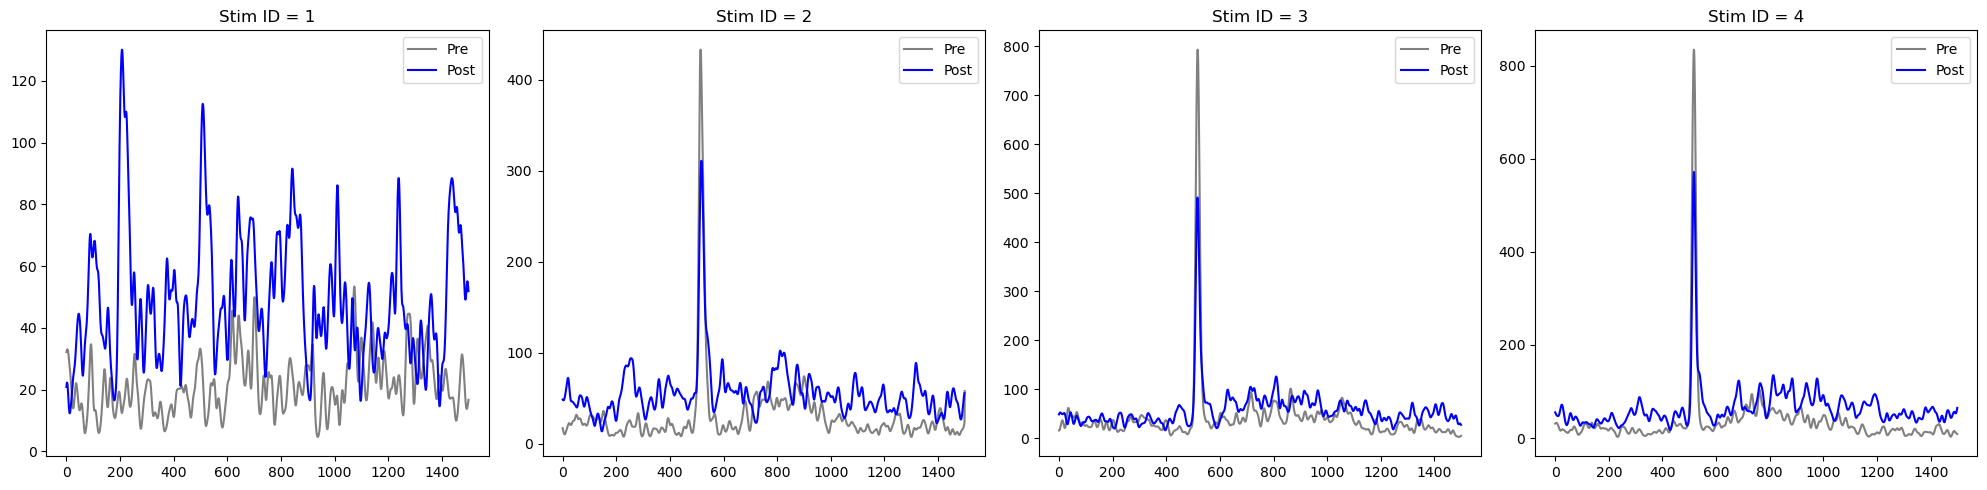

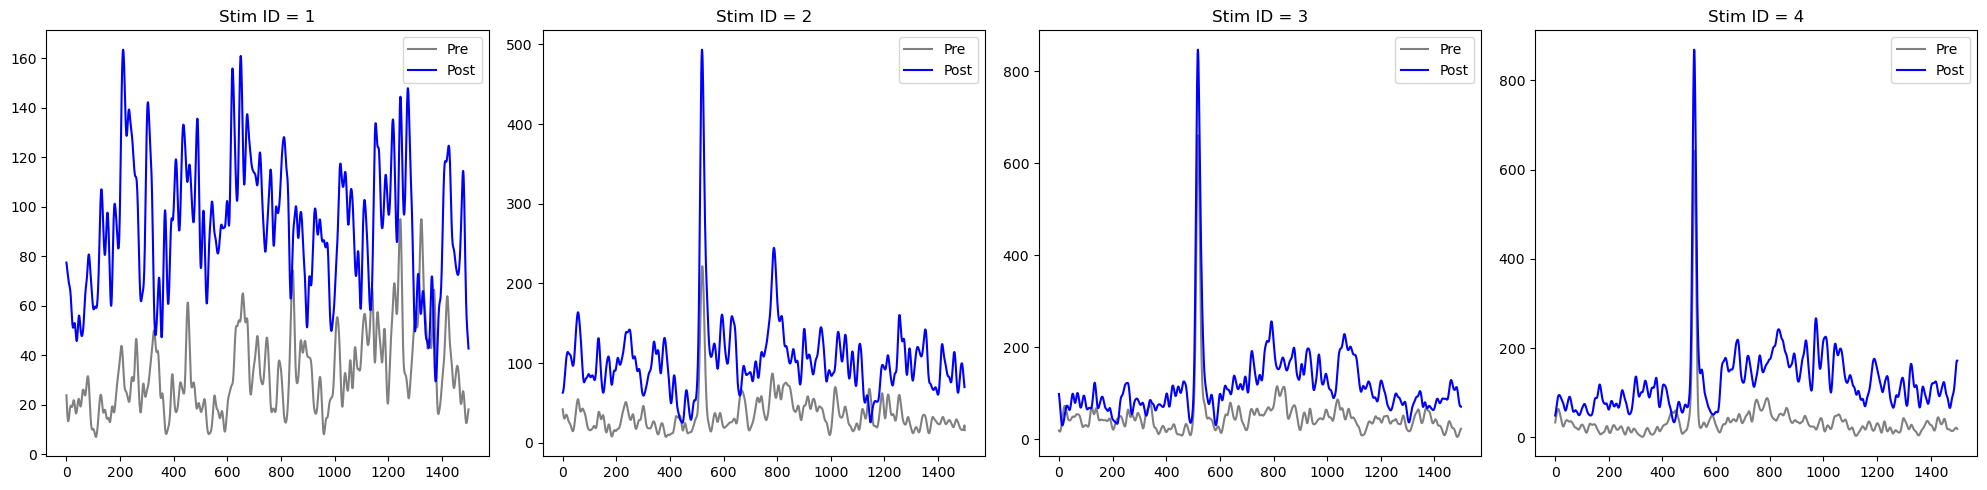

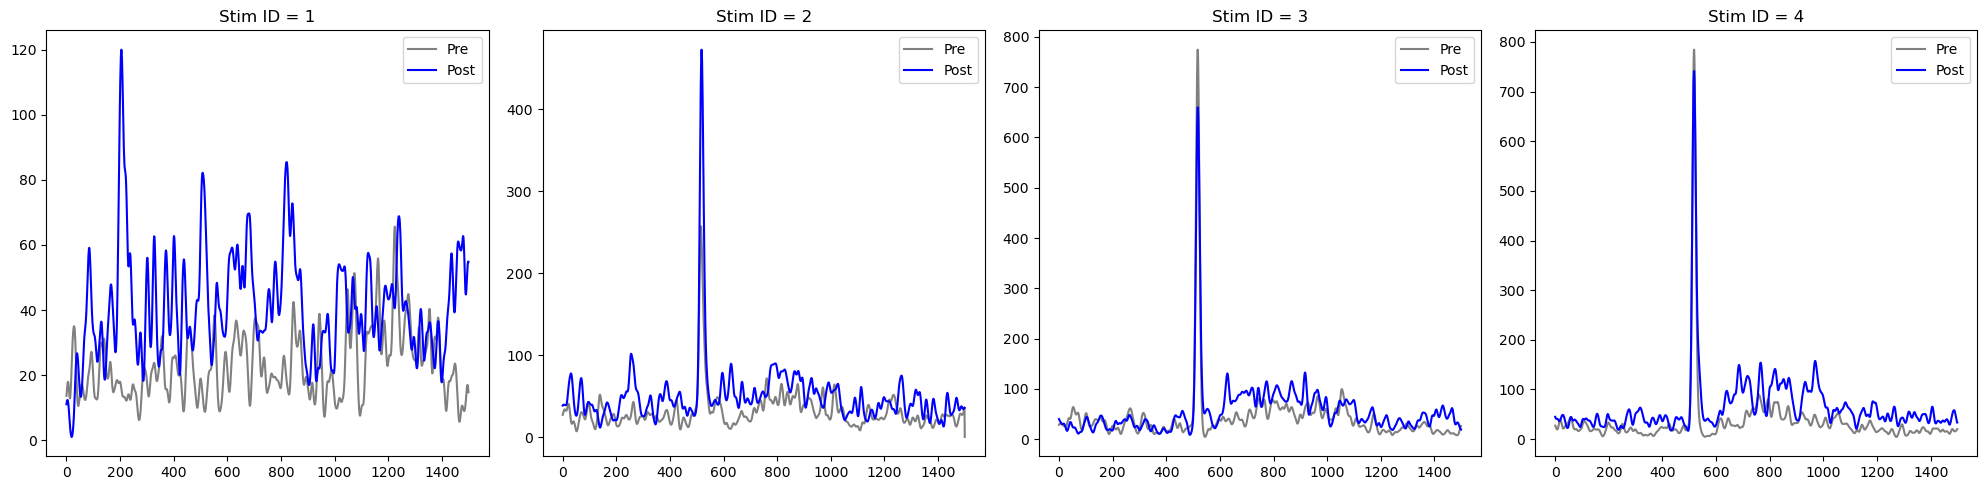

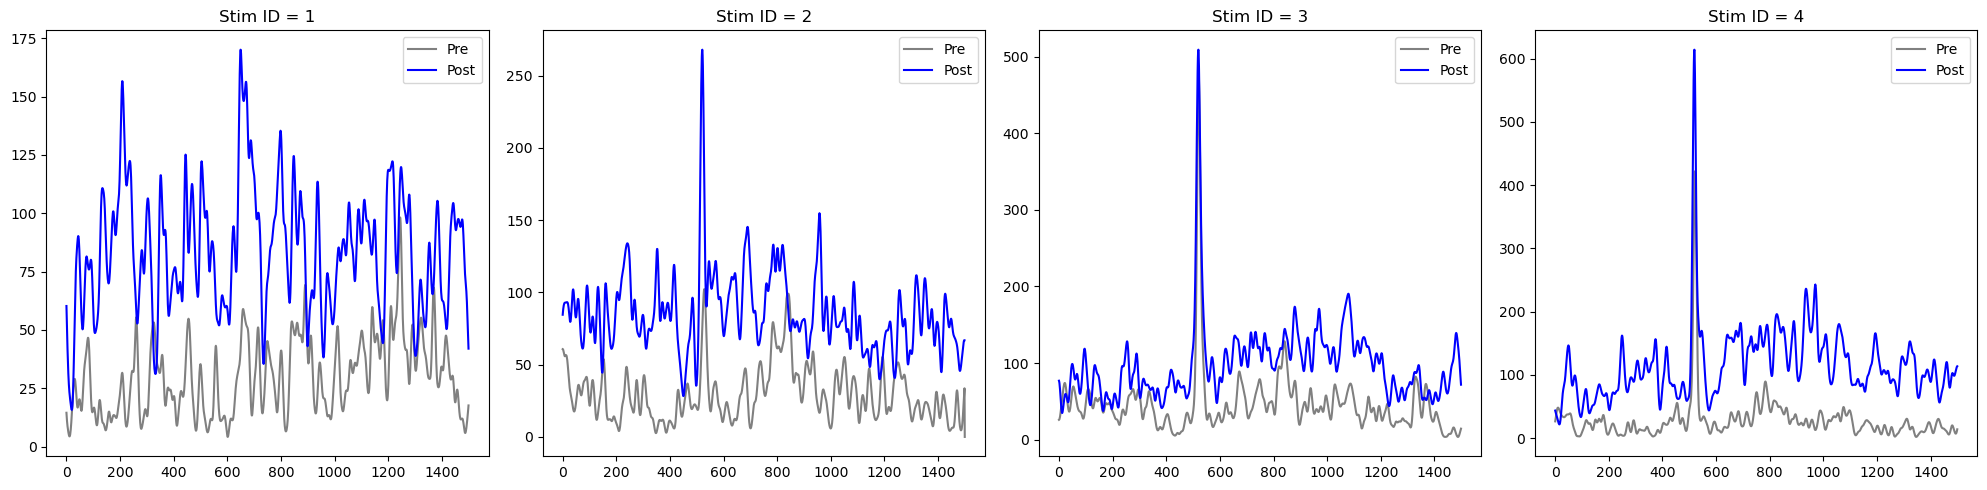

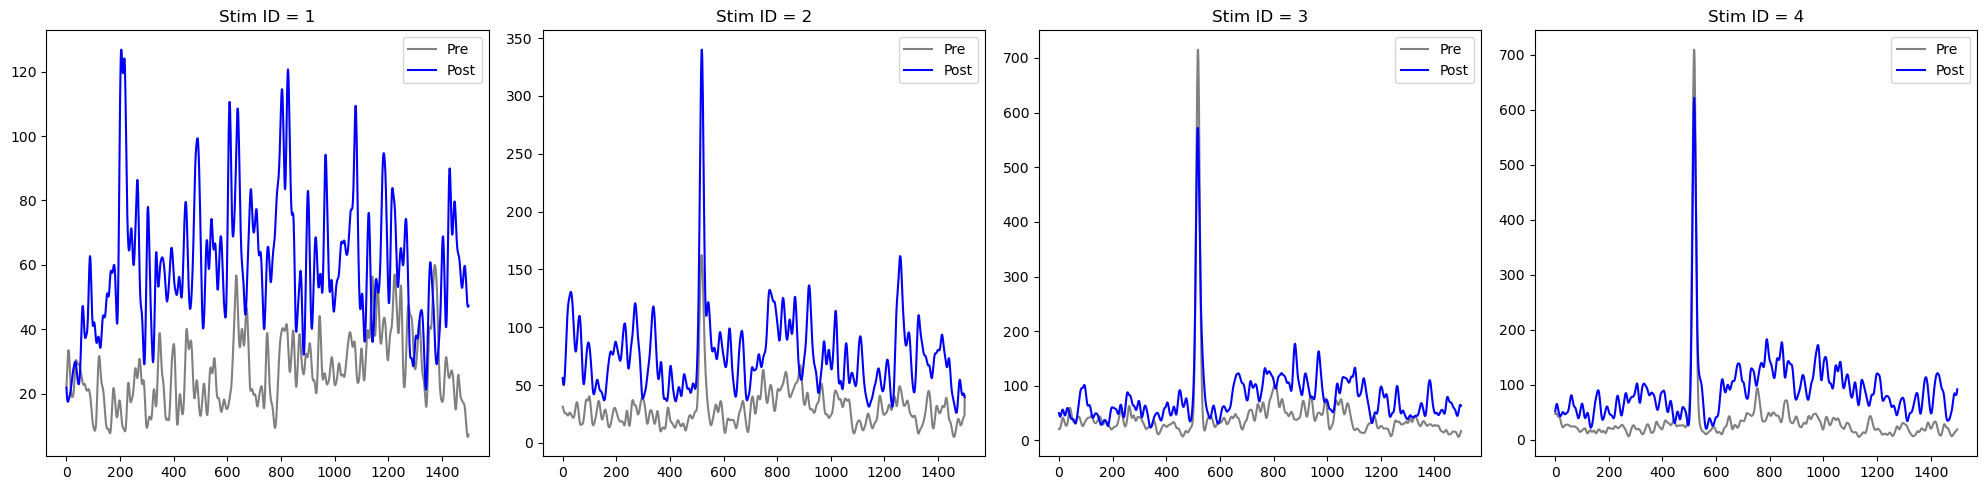

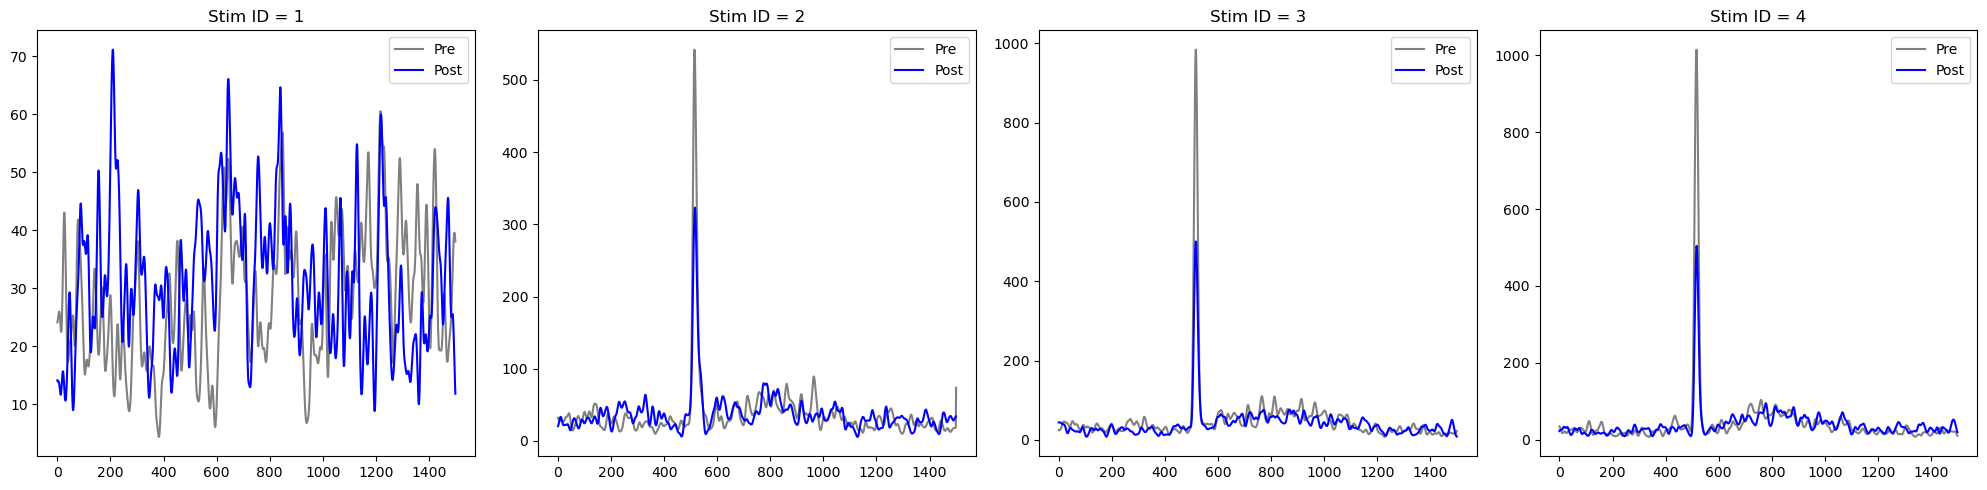

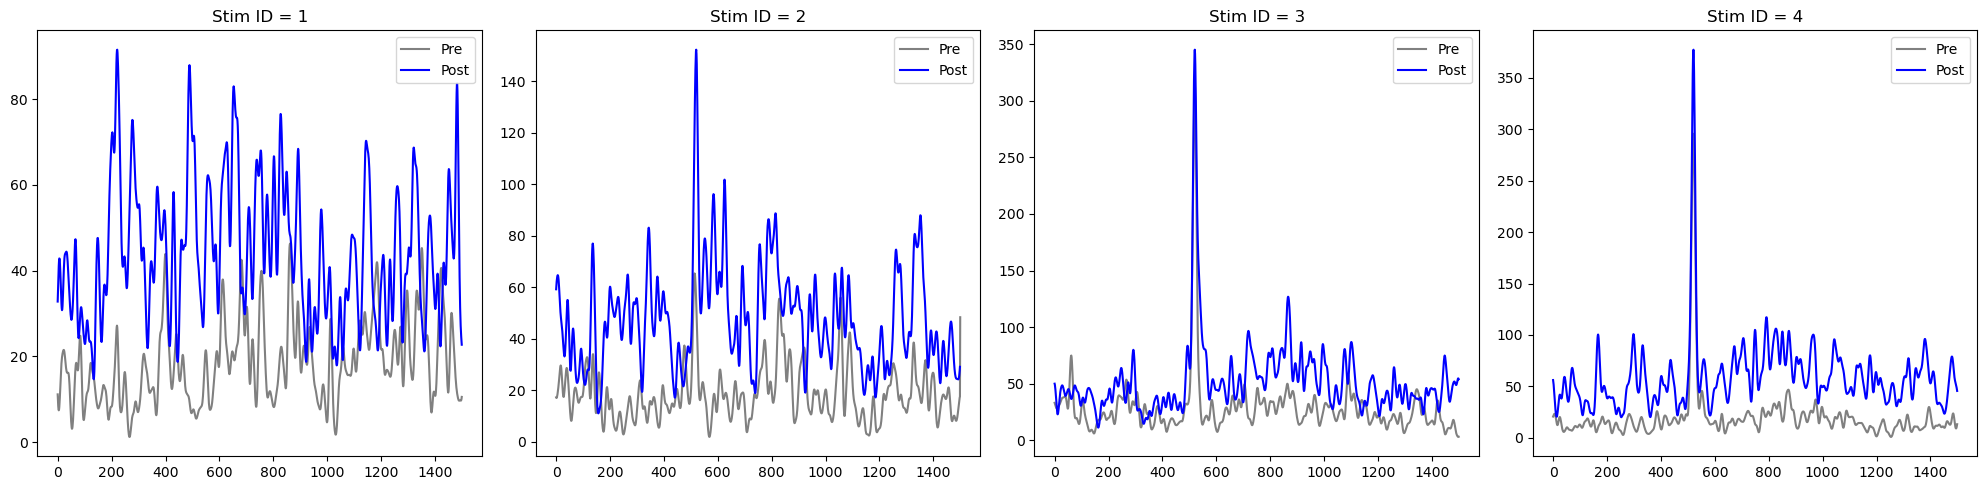

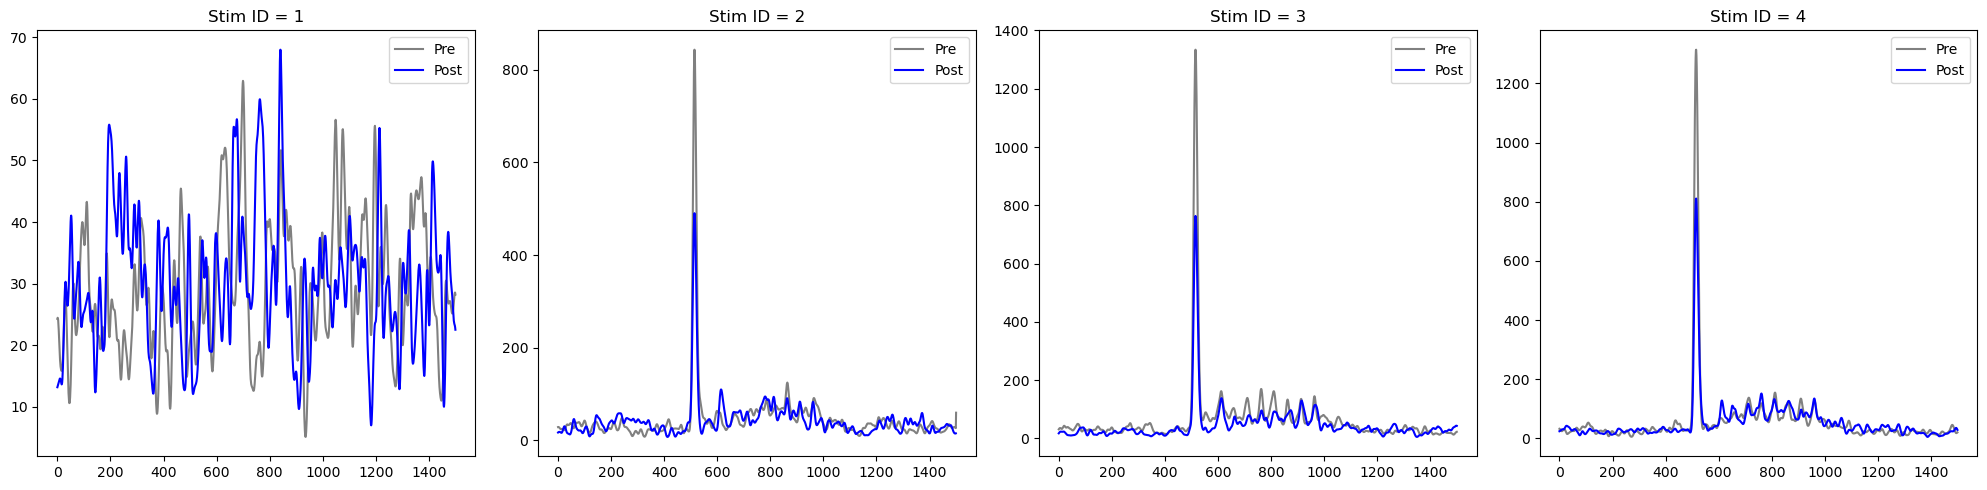

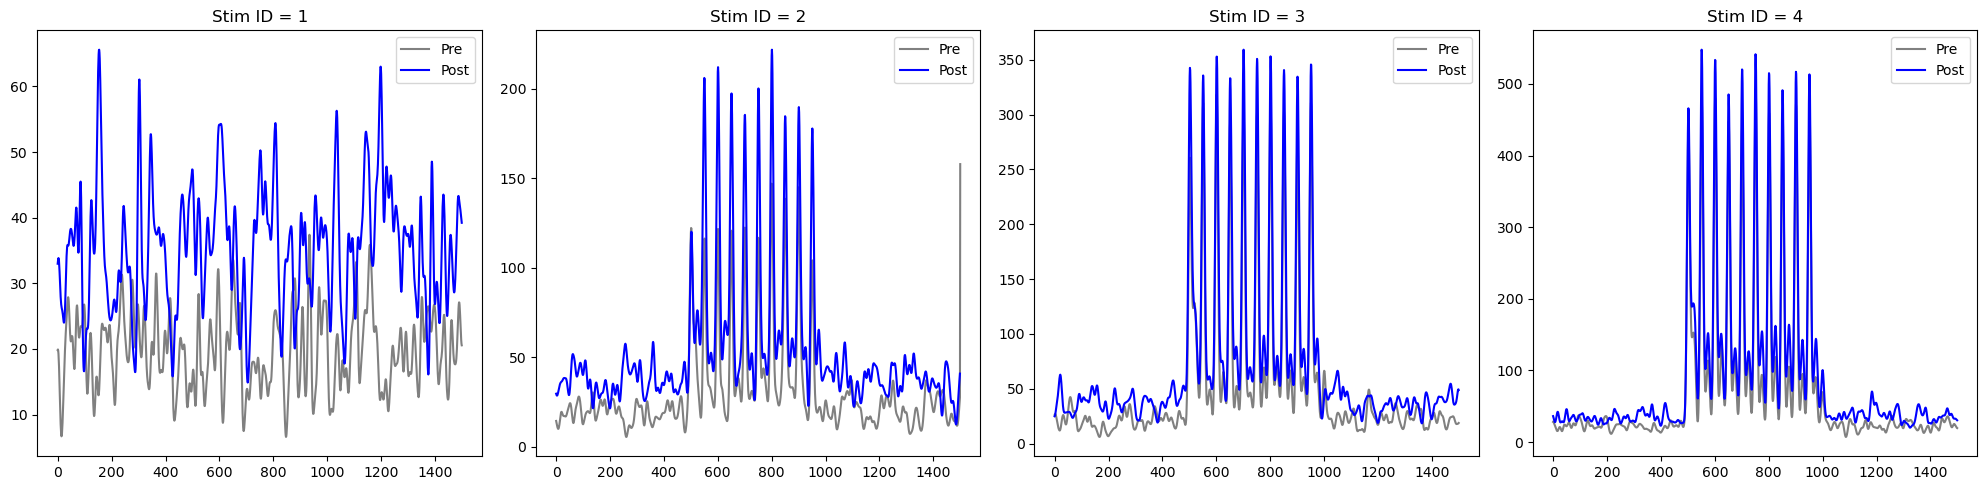

In [26]:

def calculate_psth_pre_post(recording_name, recording_results_df, stimulation_data_df, n_channels, firing_rate_estimates, bin_size=0.001, pre_trials=30, post_trials=30):
    # Get good and noisy channels for the current recording
    good_channels = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'good_channels'
    ].values[0]
    noisy_channels = recording_results_df.loc[
        recording_results_df['recording_name'] == recording_name, 
        'noisy_channels'
    ].values[0]

    good_channels = list(set(good_channels) - set(noisy_channels))

    for ch in good_channels:  # Loop through each channel
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Create a 1x4 subplot for each channel

        for stim_id in range(1, 5):  # Loop through each stimulation ID
            ax = axs[stim_id - 1]  # Get the correct axes

            # Separate the data into pre and post epochs based on the trial range specified
            stim_data = stimulation_data_df[
                (stimulation_data_df['recording_name'] == recording_name) & 
                (stimulation_data_df['stimulation_ids'] == stim_id)
            ]
            stim_data_pre = stim_data.iloc[:pre_trials] # grabs all the rows up to the pre_trials value 
            stim_data_post = stim_data.iloc[-post_trials:] # grabs all the rows from the end of the dataframe to the post_trials value

            # Calculate and plot the mean PSTH for the pre epoch
            mean_psth_pre = calculate_mean_psth(stim_data_pre, firing_rate_estimates, ch, bin_size)
            ax.plot(mean_psth_pre, color='grey', label='Pre')

            # Calculate and plot the mean PSTH for the post epoch
            mean_psth_post = calculate_mean_psth(stim_data_post, firing_rate_estimates, ch, bin_size)
            ax.plot(mean_psth_post, color='blue', label='Post')

            ax.set_title(f'Stim ID = {stim_id}')
            ax.legend()

        plt.tight_layout()
        plt.show()

def calculate_mean_psth(stim_data, firing_rate_estimates, ch, bin_size):
    psth_data = []
    for i, onset in enumerate(stim_data['onset_times']):
        # Define a time window of 1500ms centered on the stimulus onset (500ms pre-stimulus to 1000ms post-stimulus)
        start_bin = int((onset - 0.5) / bin_size)
        end_bin = int((onset + 1.0) / bin_size)
        
        # Get the PSTH data for the current trial
        trial_psth = firing_rate_estimates[ch, start_bin:end_bin]
        psth_data.append(trial_psth)
    
    # Ensuring all trials have the same shape by padding with NaNs to the maximum trial length
    max_len = max(map(len, psth_data))
    psth_data = [np.pad(trial, (0, max_len - len(trial)), 'constant', constant_values=np.nan) for trial in psth_data]

    # Calculate the mean PSTH across trials
    mean_psth = np.nanmean(np.stack(psth_data), axis=0)
        
    # Convert firing rate from spikes per bin to spikes per second (Hz)
    mean_psth /= bin_size
    
    return mean_psth

firing_rate_estimates = estimate_instantaneous_firing_rate('lmc_ch_2_3093_rec1', analysis.recording_results_df, analysis.n_channels)
calculate_psth_pre_post('lmc_ch_2_3093_rec1', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels, firing_rate_estimates, bin_size=0.001, pre_trials=30, post_trials=30)

In [ ]:
#create a for loop to loop over each unique recording name in the recording_results_df
for recording_name in analysis.recording_results_df['recording_name'].unique():
    #calculate the firing rate estimates for the recording name
    firing_rate_estimates = estimate_instantaneous_firing_rate(recording_name, analysis.recording_results_df, analysis.n_channels)
    #calculate the psth pre and post for the recording name plot the results
    calculate_psth_pre_post(recording_name, analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels, firing_rate_estimates, bin_size=0.001, pre_trials=30, post_trials=30)

In [ ]:
#create a for loop to loop over each unique recording name in the recording_results_df
for recording_name in analysis.recording_results_df['recording_name'].unique():
    #print the recording name
    print(recording_name) 
    #calculate the firing rate estimates for the recording name
    firing_rate_estimates = estimate_instantaneous_firing_rate(recording_name, analysis.recording_results_df, analysis.n_channels)
    #calculate the psth pre and post for the recording name plot the results
    calculate_psth_pre_post(recording_name, analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels, firing_rate_estimates, bin_size=0.001, pre_trials=50, post_trials=50)
    

In [ ]:
analysis.recording_results_df['recording_name'].unique()

In [ ]:
firing_rate_estimates = estimate_instantaneous_firing_rate('lmc_ch_1_3094_rec2', analysis.recording_results_df, analysis.n_channels)

calculate_psth_pre_post('lmc_ch_1_3094_rec2', analysis.recording_results_df, analysis.stimulation_data_df, analysis.n_channels, firing_rate_estimates, bin_size=0.001, pre_trials=30, post_trials=30)